# ICU Patient Mortality Risk Prediction (Yes/No Prediction)

## Introduction
In the Intensive Care Unit (ICU), timely identification of patients at high risk of mortality is crucial for effective intervention and improved patient outcomes. ICUs often handle patients in critical conditions, where every decision impacts survival rates. However, accurately assessing which patients are most at risk poses a significant challenge due to the complex and varied nature of clinical data. The ability to predict mortality risk can empower healthcare providers to prioritize resources and administer necessary interventions, ultimately enhancing the chances of survival. This project aims to address this challenge by developing a predictive model that analyzes key clinical indicators to forecast mortality risk in ICU patients. Through this approach, the project seeks to provide healthcare professionals with a valuable tool for supporting early, data-driven interventions.

## Project Objectives
The primary objectives of this project are as follows:
1. To develop a predictive model that assesses ICU patient mortality risk based on clinical data, including vitals, lab results, and patient history.
2. To improve early intervention strategies by identifying high-risk patients before conditions worsen, enabling proactive care management.
3. To enhance ICU operational efficiency by optimizing the allocation of resources toward patients with critical needs, thereby increasing survival rates within the ICU.
4. To validate model accuracy and effectiveness by evaluating prediction outcomes to ensure reliable performance that meets clinical needs.

## Project Overview
This project leverages a Decision Tree classifier to analyze ICU patient data, focusing on demographic and health-related features relevant to mortality risk. By implementing machine learning techniques on a robust dataset of clinical indicators, the model aims to accurately predict patient outcomes, thereby supporting healthcare providers in making informed decisions. The model’s performance is evaluated using key metrics to ensure it meets the standards necessary for ICU settings. Through this predictive tool, the project contributes to a data-driven approach to critical care, aligning with the broader goals of enhancing patient survival rates and improving ICU efficiency.

In [668]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [669]:
# Read in data from a CSV file and store it in a pandas DataFrame
df = pd.read_csv("D:/projects/mortality_data.csv")

In [670]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [672]:
df.shape

(91713, 85)

In [673]:
# Drop one or more columns by their names
columns_to_drop = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'Unnamed: 83']
df = df.drop(columns=columns_to_drop)

In [674]:
df.isnull().sum()

age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
gender                           25
                               ... 
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
hospital_death                    0
Length: 80, dtype: int64

In [675]:
# Iterate through columns
for column in df.columns:
    if df[column].dtype == 'float64':
        # Handle numeric columns (replace NaN with mean)
        df[column] = df[column].fillna(df[column].mean())
    elif df[column].dtype == 'object':
        # Handle categorical columns (replace NaN with mode)
        df[column] = df[column].fillna(df[column].mode()[0])

In [676]:
df.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [677]:
df["hospital_death"]

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

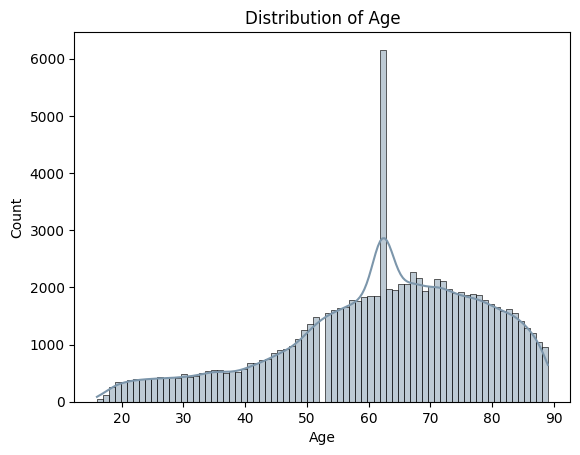

In [678]:
# Create a histogram with a kernel density estimate for the 'age' column
sns.histplot(df['age'], kde=True, color="#7C96AB")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Age")

# Display the plot
plt.show()

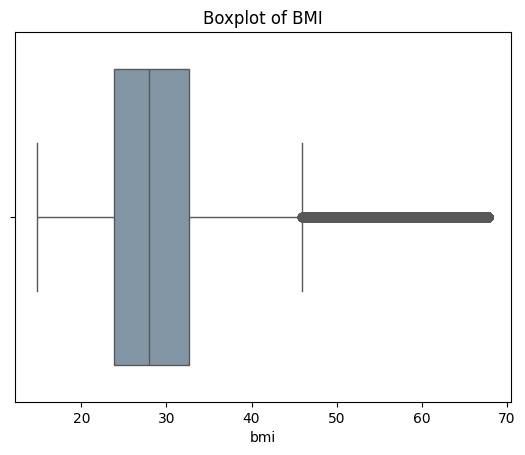

In [679]:
# Create a boxplot for the 'bmi' column
sns.boxplot(x=df['bmi'], color="#7C96AB")

# Add labels to the x-axis
plt.xlabel("bmi")

# Set the title of the plot
plt.title("Boxplot of BMI")

# Display the plot
plt.show() 

In [680]:
# Count the occurrences of each gender category
df['gender'].value_counts()

gender
M    49494
F    42219
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1bdecf86780>,
 [Text(-0.5972255302775132, -0.9237541155441439, 'Male'),
  Text(0.5972256167656136, 0.9237540596278496, 'Female')],
 [Text(-0.3257593801513708, -0.5038658812058966, '54.0%'),
  Text(0.3257594273266983, 0.5038658507060997, '46.0%')])

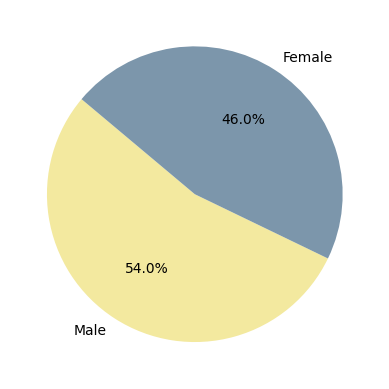

In [681]:
# Define labels for the pie chart
labels = ['Male', 'Female']

# Define sizes for each segment of the pie chart
sizes = [49469, 42219]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [682]:
# Group by 'gender' and count 'hospital_death'
df.groupby(['gender']).agg({'hospital_death': 'count'})

,hospital_death
gender,
F,42219
M,49494


([<matplotlib.patches.Wedge at 0x1bdcb89abd0>,
 [Text(-0.5972255302775132, -0.9237541155441439, 'Male'),
  Text(0.5972256167656136, 0.9237540596278496, 'Female')],
 [Text(-0.3257593801513708, -0.5038658812058966, '54.0%'),
  Text(0.3257594273266983, 0.5038658507060997, '46.0%')])

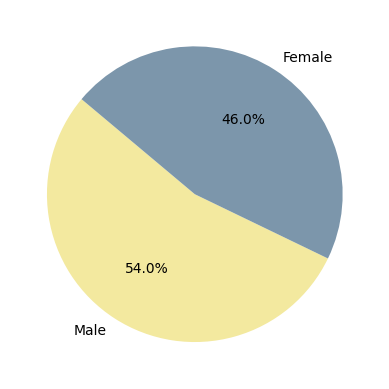

In [683]:
# Define labels for the pie chart
labels = ['Male', 'Female']

# Define sizes for each segment of the pie chart
sizes = [49469, 42219]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [684]:
# How many times each unique value appears in elective_surgery column
df['elective_surgery'].value_counts()

elective_surgery
0    74862
1    16851
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1bde53c5ca0>,
 [Text(-1.0919695680298986, 0.13267427217285543, 'Yes'),
  Text(1.0919695742408282, -0.13267422105407023, 'No')],
 [Text(-0.5956197643799446, 0.07236778482155751, '18.4%'),
  Text(0.5956197677677244, -0.07236775693858376, '81.6%')])

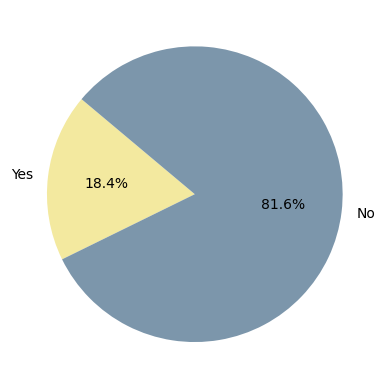

In [685]:
# Define labels for the pie chart
labels = ['Yes', 'No']

# Define sizes or proportions for each category
sizes = [16851, 74862]

# Define colors for the pie chart segments
colors = ["#F3E99F", "#7C96AB"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [686]:
# How many times each unique value appears in ethnicity column
df['ethnicity'].value_counts()

ethnicity
Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: count, dtype: int64

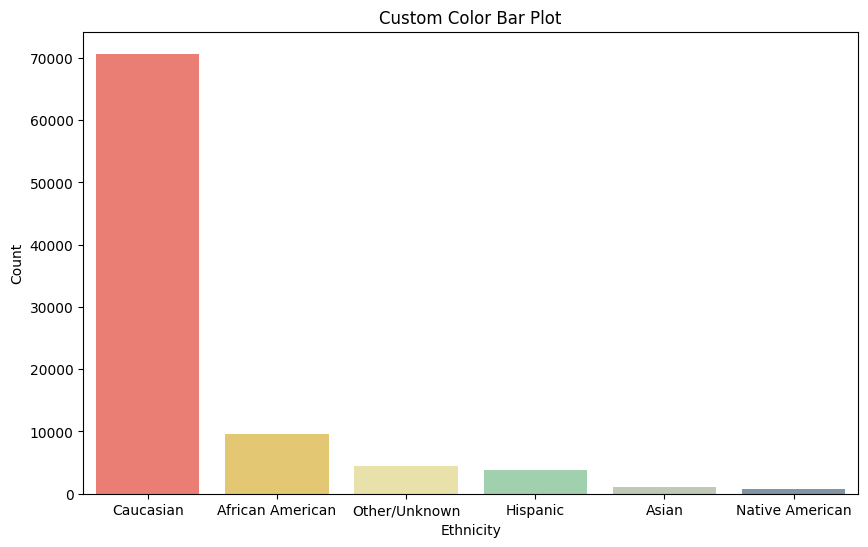

In [687]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']
value_counts = [70684, 9547, 4374, 3796, 1129, 788]
labels = ['Caucasian', 'African American', 'Other/Unknown', 'Hispanic', 'Asian', 'Native American']

# Create a DataFrame
data = pd.DataFrame({'Ethnicity': labels, 'Count': value_counts})

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn with the custom color palette and hue
sns.barplot(x='Ethnicity', y='Count', data=data, hue='Ethnicity', dodge=False, palette=custom_palette, legend=False)

# Add labels and a title
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Custom Color Bar Plot')

# Display plot
plt.show()

In [688]:
# Group by 'ethnicity' and count 'hospital_death'
df.groupby(['ethnicity']).agg({'hospital_death': 'count'})

,hospital_death
ethnicity,
African American,9547
Asian,1129
Caucasian,72079
Hispanic,3796
Native American,788
Other/Unknown,4374


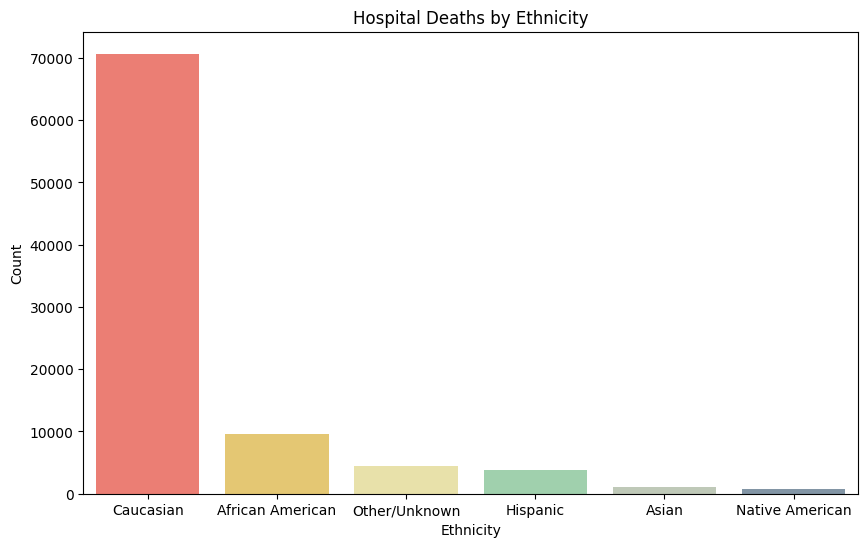

In [689]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for the bar plot
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']
value_counts = [70684, 9547, 4374, 3796, 1129, 788]
labels = ['Caucasian', 'African American', 'Other/Unknown', 'Hispanic', 'Asian', 'Native American']

# Create a DataFrame
data = pd.DataFrame({'Ethnicity': labels, 'Count': value_counts})

# Set figure size
plt.figure(figsize=(10, 6))

# Plot each bar individually with a specific color
for i, (ethnicity, count) in enumerate(zip(labels, value_counts)):
    sns.barplot(x=[ethnicity], y=[count], color=custom_palette[i])

# Label the x-axis
plt.xlabel('Ethnicity')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Hospital Deaths by Ethnicity')

# Display plot
plt.show()

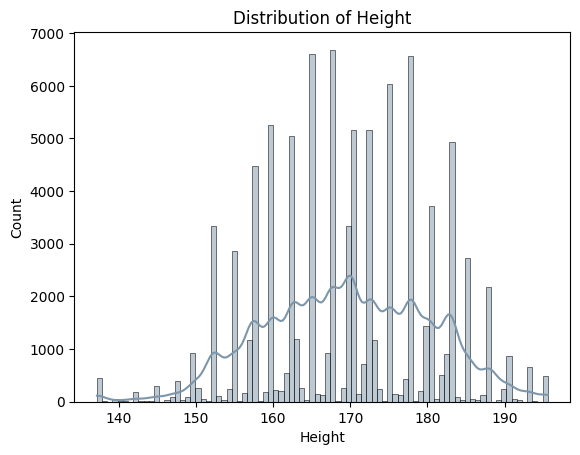

In [690]:
# Create a histogram with a kernel density estimate for the 'height' column
sns.histplot(df['height'], kde=True, color="#7C96AB")

# Label the x-axis
plt.xlabel("Height")

# Label the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Height")

# Display the plot
plt.show()

In [691]:
# How many times each unique value appears in icu_admit_source column
df['icu_admit_source'].value_counts()

icu_admit_source
Accident & Emergency         54172
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: count, dtype: int64

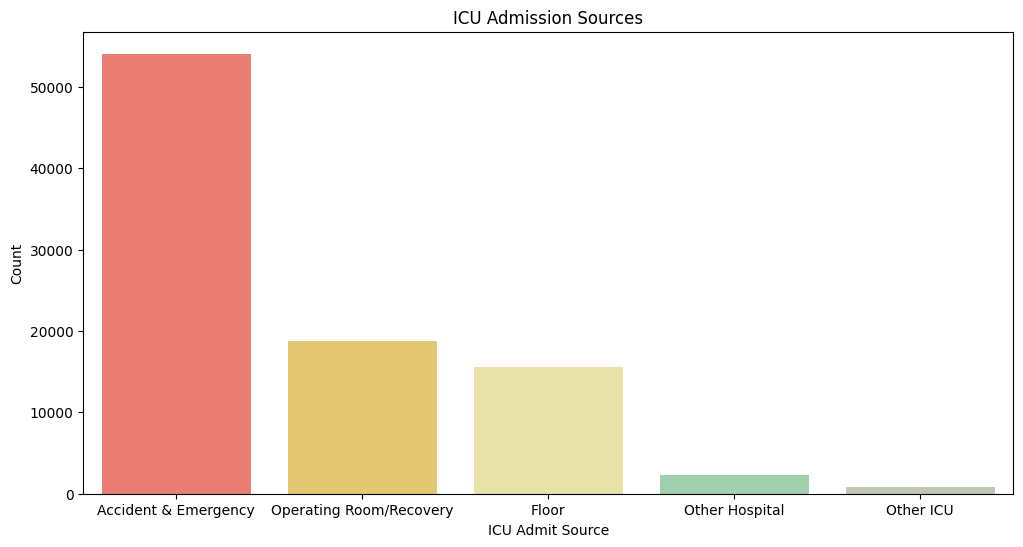

In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5']

# Values and labels for the bar plot
value_counts = [54060, 18713, 15611, 2358, 859]
labels = ['Accident & Emergency', 'Operating Room/Recovery', 'Floor', 'Other Hospital', 'Other ICU']

# Create a DataFrame from the values and labels
data = pd.DataFrame({'icu_admit_source': labels, 'Count': value_counts})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each bar individually with specific colors from the palette
for i, (source, count) in enumerate(zip(labels, value_counts)):
    sns.barplot(x=[source], y=[count], color=custom_palette[i])

# Add labels to the x-axis and y-axis
plt.xlabel('ICU Admit Source')
plt.ylabel('Count')

# Set plot title
plt.title('ICU Admission Sources')

# Display plot
plt.show()

In [693]:
# How many times each unique value appears in icu_stay_type column
df['icu_stay_type'].value_counts()

icu_stay_type
admit       86183
transfer     4970
readmit       560
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1bdcab4dca0>,
 [Text(0.6944371656244325, -0.8530867617068645, 'admit'),
  Text(-0.677946064411768, 0.8662500411247294, 'Transfer'),
  Text(-0.828931435720883, 0.7230993533904699, 'Readmit')])

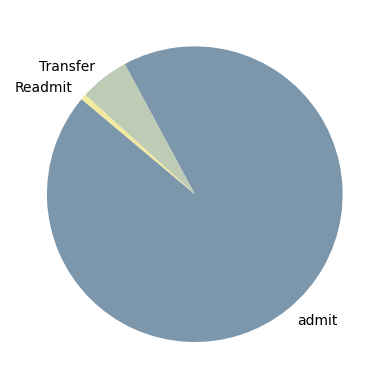

In [694]:
# Define labels for the pie chart
labels = ['admit', 'Transfer', 'Readmit']

# Define sizes or proportions for each category
sizes = [86183, 4970, 560]

# Define colors for the pie chart segments
colors = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, startangle=140)

In [695]:
# How many times each unique value appears in icu_type column
icu_type_counts = df['icu_type'].value_counts()

C:\Users\kipye\AppData\Local\Temp\ipykernel_21340\2961688519.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icu_type_counts.index, y=icu_type_counts.values, palette=custom_palette)


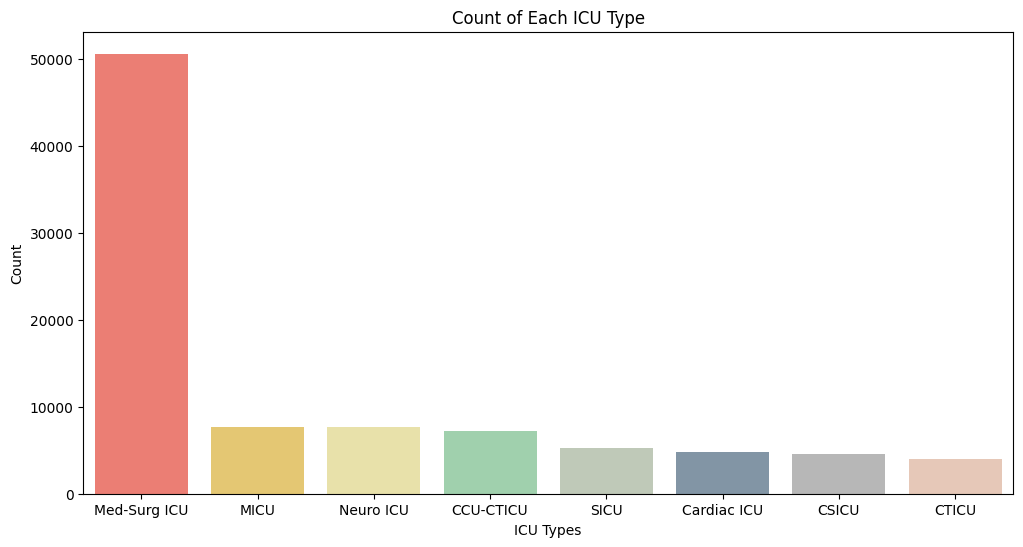

In [696]:
# Custom color palette with color names
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB', '#B7B7B7', '#EDC6B1']

# Remove the `data=df` argument from sns.barplot and use only the `x` and `y` arguments
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(x=icu_type_counts.index, y=icu_type_counts.values, palette=custom_palette)

# Add labels to the x-axis and y-axis
plt.xlabel('ICU Types')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of Each ICU Type')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Boxplot of pre_icu_los_days')

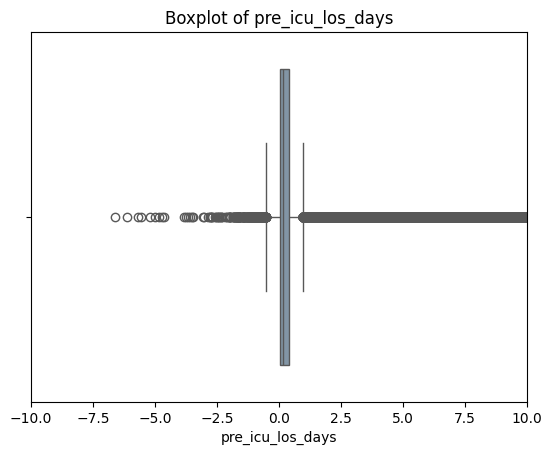

In [697]:
# Set the x-axis and y-axis limits to make the range smaller
plt.xlim(-10, 10)  # Set the x-axis limits (adjust the values as needed)
plt.ylim(0, 1000)  # Set the y-axis limits (adjust the values as needed)

# Create a boxplot for the 'pre_icu_los_days' data
sns.boxplot(x=df['pre_icu_los_days'], color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("pre_icu_los_days")

# Set the title of the plot
plt.title("Boxplot of pre_icu_los_days")

Text(0.5, 1.0, 'Distribution of Weights')

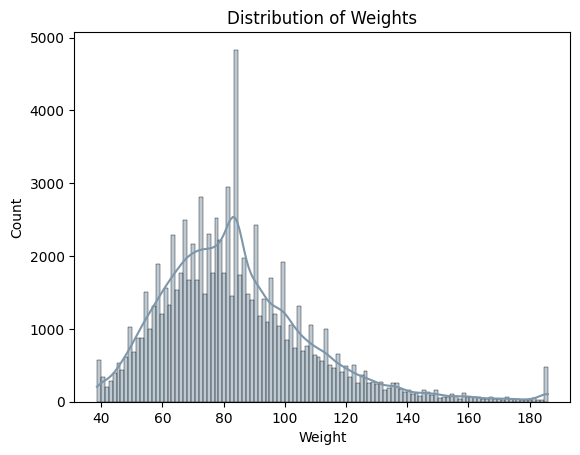

In [698]:
# Create a histogram with a kernel density estimate for the 'weight' column
sns.histplot(df['weight'], kde=True, color='#7C96AB')

# Label the x-axis
plt.xlabel("Weight")

# Label the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Weights")

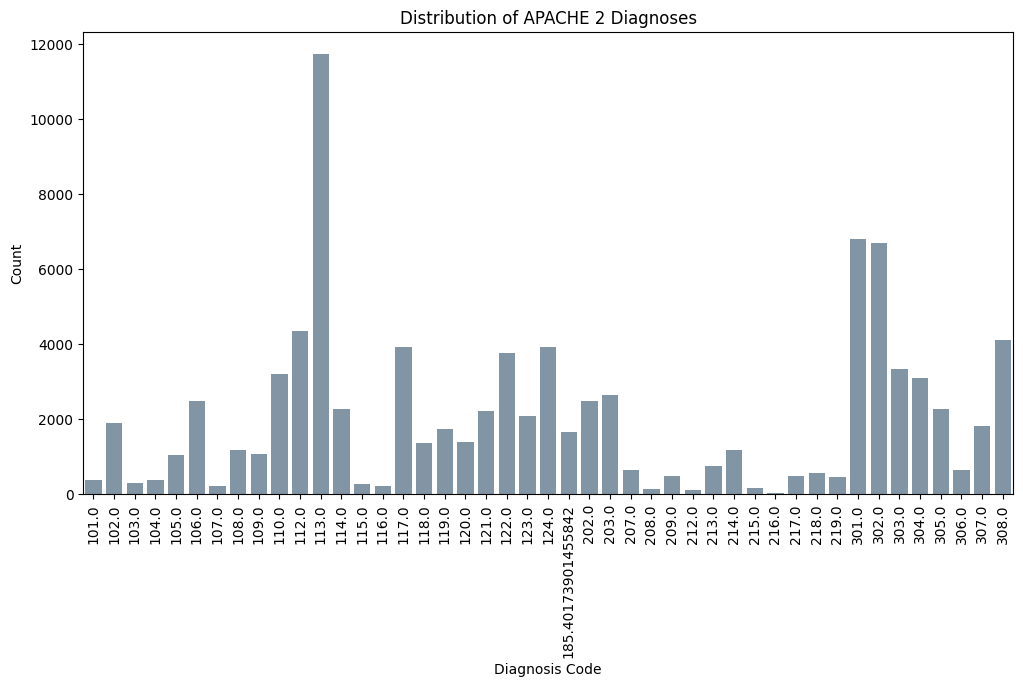

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Use a single color for the count plot to avoid cycling issues
sns.countplot(data=df, x='apache_2_diagnosis', color='#7C96AB')  # Using a single color

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Label the x-axis
plt.xlabel('Diagnosis Code')

# Label the y-axis
plt.ylabel('Count')

# Set the title of the plot
plt.title('Distribution of APACHE 2 Diagnoses')

# Display plot
plt.show()

Text(0.5, 1.0, 'Distribution of APACHE 3J Diagnoses')

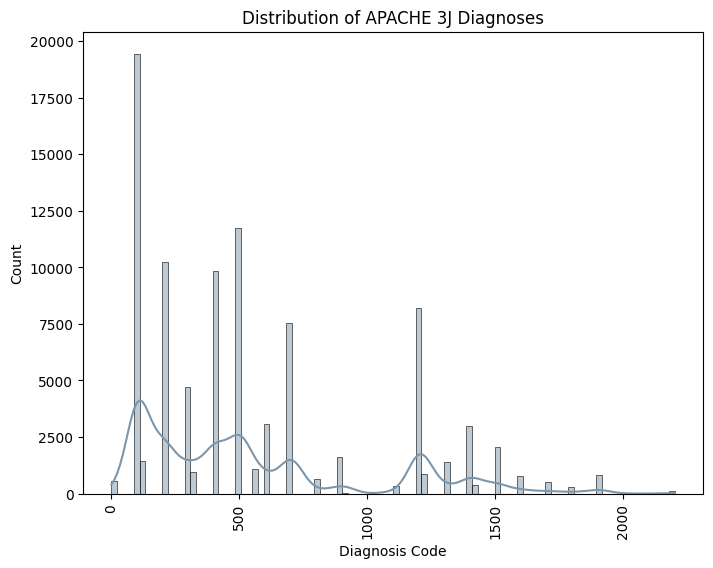

In [700]:
# Set the figure size (adjust as needed)
plt.figure(figsize=(8, 6))

# Create a histogram with a kernel density estimate (KDE) for the 'apache_3j_diagnosis' column
sns.histplot(data=df, x='apache_3j_diagnosis', kde=True, color='#7C96AB')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Add labels to the x-axis and y-axis
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Distribution of APACHE 3J Diagnoses')

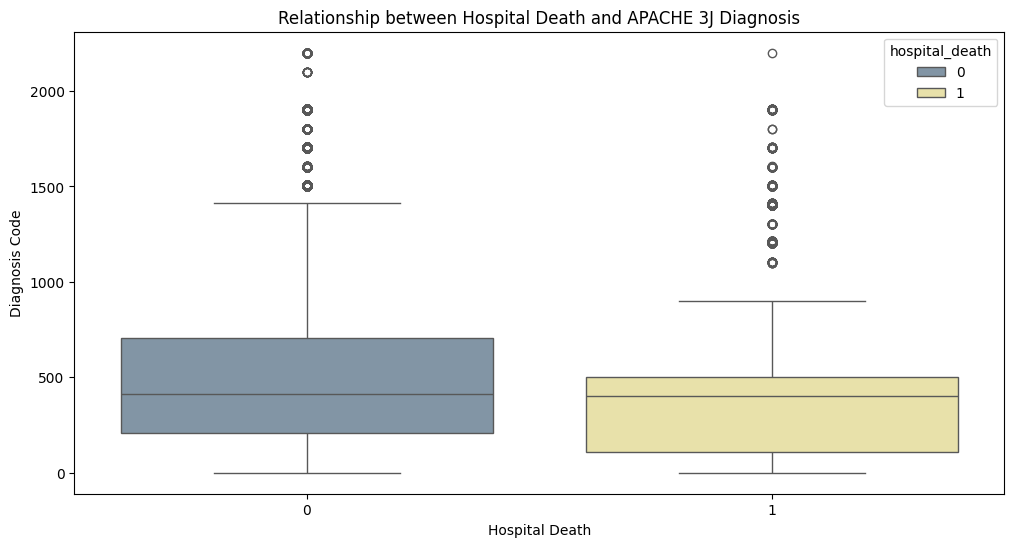

In [701]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#7C96AB', '#F3E99F']

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a box plot to visualize the relationship between 'hospital_death' and 'apache_3j_diagnosis'
sns.boxplot(data=df, x='hospital_death', y='apache_3j_diagnosis', hue='hospital_death', palette=custom_palette)

# Label the x-axis
plt.xlabel('Hospital Death')

# Label the y-axis
plt.ylabel('Diagnosis Code')

# Set the title of the plot
plt.title('Relationship between Hospital Death and APACHE 3J Diagnosis')

# Display plot
plt.show()

In [702]:
# How many times each unique value appears in apache_post_operative column
df['apache_post_operative'].value_counts()

apache_post_operative
0    73269
1    18444
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1bdef494d40>,
 [Text(0.2624053165861489, -1.0682431604402263, 'No'),
  Text(-0.2624054166022895, 1.0682431358720632, 'Yes')],
 [Text(0.14313017268335393, -0.5826780875128507, '79.9%'),
  Text(-0.14313022723761243, 0.5826780741120344, '20.1%')])

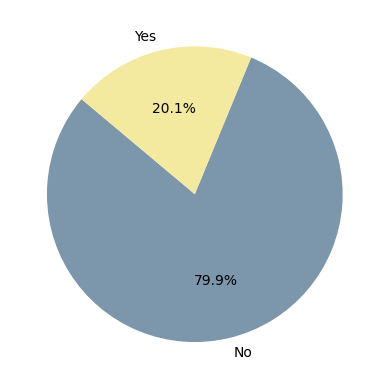

In [703]:
# Define labels for the pie chart
labels = ['No', 'Yes']

# Define sizes or proportions for each category
sizes = [73269, 18444]

# Define colors for the pie chart segments
colors = ["#7C96AB", "#F3E99F"]

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

In [704]:
# How many times each unique value appears in arf_apache column
df['arf_apache'].value_counts()

arf_apache
0.000000    88452
1.000000     2546
0.027979      715
Name: count, dtype: int64

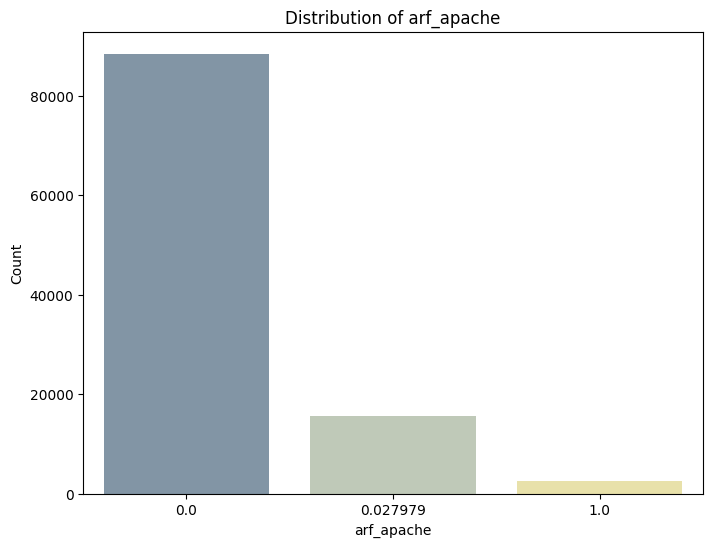

In [705]:
# Define a list of unique values in the 'arf_apache' column
arf_apache_values = [0.0, 1.0, 0.027979]

# Define the corresponding counts for each value
value_counts = [88452, 2546, 15611]

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a DataFrame for plotting
data = pd.DataFrame({'arf_apache': arf_apache_values, 'Count': value_counts})

# Create a bar plot to visualize the distribution of 'arf_apache' with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x='arf_apache', y='Count', data=data, hue='arf_apache', palette=custom_palette, dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("arf_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of arf_apache")

# Show the plot
plt.show()

In [706]:
# How many times each unique value appears in arf_apache column
df['gcs_eyes_apache'].value_counts()

gcs_eyes_apache
4.000000    62995
3.000000    13863
1.000000     8274
2.000000     4680
3.465049     1901
Name: count, dtype: int64

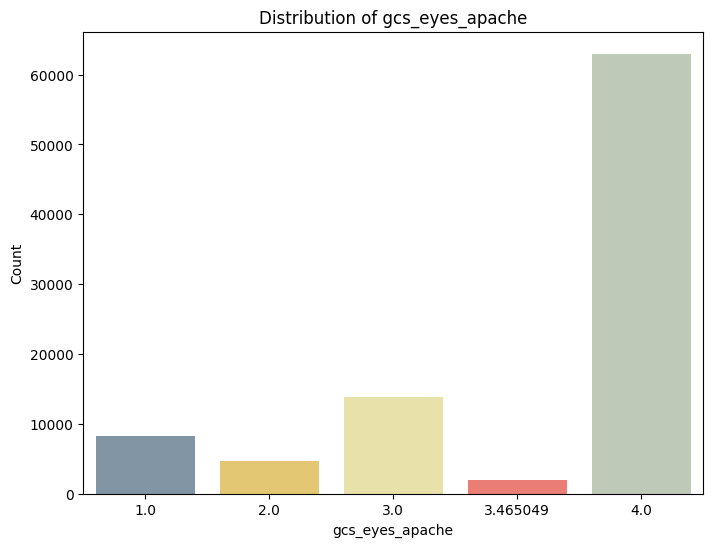

In [707]:
# Define a list of unique values in the 'gcs_eyes_apache' column
gcs_eyes_apache_values = [1.0, 2.0, 3.0, 3.465049, 4.0]

# Define the corresponding counts for each value
value_counts = [8274, 4680, 13863, 1901, 62995]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#7C96AB', '#F7D060', '#F3E99F', '#FF6D60', '#BFCCB5']

# Create a DataFrame for plotting
data = pd.DataFrame({'gcs_eyes_apache': gcs_eyes_apache_values, 'Count': value_counts})

# Create a bar plot to visualize the distribution of 'gcs_eyes_apache' with the custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='gcs_eyes_apache', y='Count', data=data, hue='gcs_eyes_apache', palette=custom_palette, dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("gcs_eyes_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_eyes_apache")

# Show the plot
plt.show()

In [708]:
# How many times each unique value appears in arf_apache column
df['gcs_motor_apache'].value_counts()

gcs_motor_apache
6.000000    70960
5.000000     7982
1.000000     5543
4.000000     4494
5.471195     1901
3.000000      524
2.000000      309
Name: count, dtype: int64

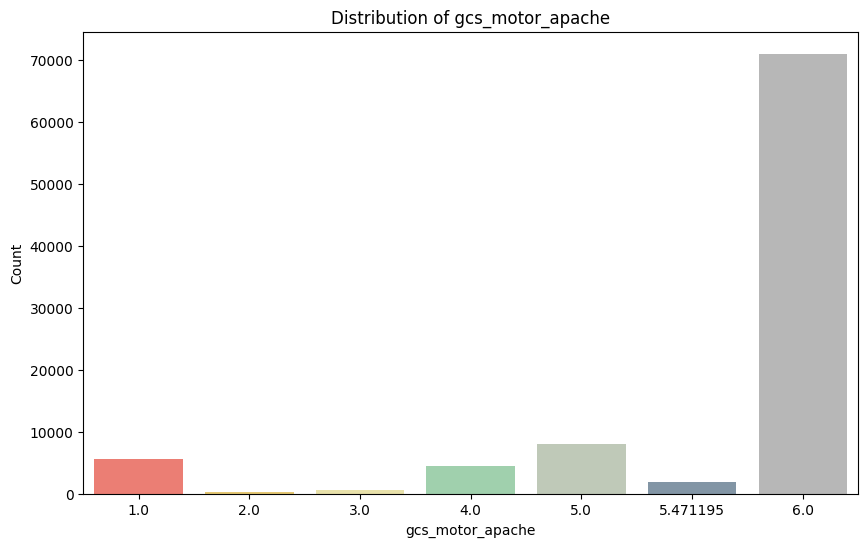

In [709]:
# Define a list of unique values in the 'gcs_motor_apache' column
gcs_motor_apache_values = [1.0, 2.0, 3.0, 4.0, 5.0, 5.471195, 6.0]

# Define the corresponding counts for each value
value_counts = [5543, 309, 524, 4494, 7982, 1901, 70960]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB', '#B7B7B7']

# Create a DataFrame for plotting
data = pd.DataFrame({'gcs_motor_apache': gcs_motor_apache_values, 'Count': value_counts})

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of 'gcs_motor_apache' with the custom color palette
sns.barplot(x='gcs_motor_apache', y='Count', data=data, hue='gcs_motor_apache', palette=custom_palette, dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("gcs_motor_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_motor_apache")

# Show the plot
plt.show()

In [710]:
# How many times each unique value appears in gcs_unable_apache column
df['gcs_unable_apache'].value_counts()

gcs_unable_apache
0.000000    89812
0.009528     1037
1.000000      864
Name: count, dtype: int64

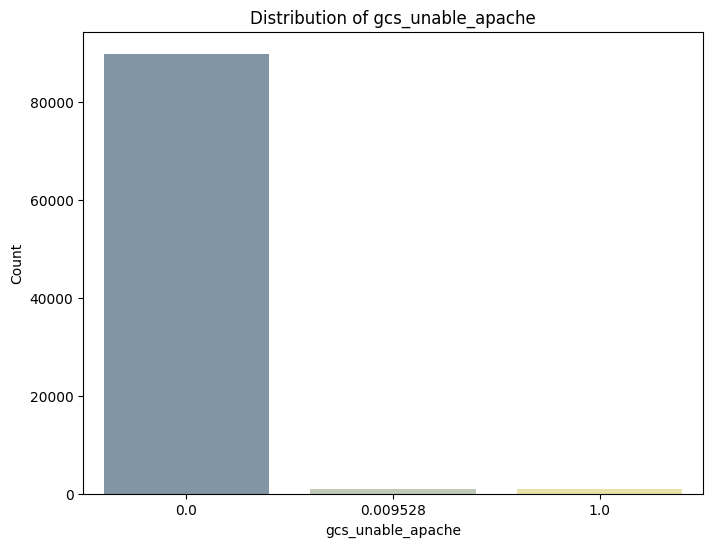

In [711]:
# Define a list of unique values in the 'gcs_unable_apache' column
gcs_unable_apache_values = [0.000000, 0.009528, 1.000000]

# Define the corresponding counts for each value
value_counts = [89812, 1037, 864]

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a DataFrame for plotting
data = pd.DataFrame({'gcs_unable_apache': gcs_unable_apache_values, 'Count': value_counts})

# Create a bar plot to visualize the distribution of 'gcs_unable_apache' with the custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='gcs_unable_apache', y='Count', data=data, palette=custom_palette, hue='gcs_unable_apache', dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("gcs_unable_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_unable_apache")

# Show the plot
plt.show()

In [712]:
# How many times each unique value appears in gcs_verbal_apache column
df['gcs_verbal_apache'].value_counts()

gcs_verbal_apache
5.000000    56909
1.000000    16741
4.000000    10947
3.000000     3275
2.000000     1940
3.994778     1901
Name: count, dtype: int64

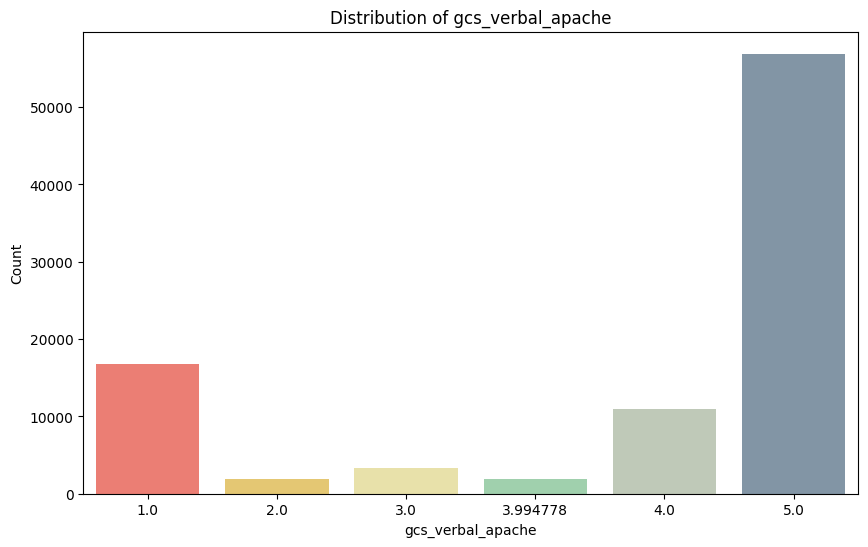

In [713]:
# Define a list of unique values in the 'gcs_verbal_apache' column
gcs_verbal_apache_values = [1.000000, 2.000000, 3.000000, 3.994778, 4.000000, 5.000000]

# Define the corresponding counts for each value
value_counts = [16741, 1940, 3275, 1901, 10947, 56909]

# Define a custom color palette with hexadecimal color codes
custom_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB']

# Create a DataFrame for plotting
data = pd.DataFrame({'gcs_verbal_apache': gcs_verbal_apache_values, 'Count': value_counts})

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the distribution of 'gcs_verbal_apache' with the custom color palette
sns.barplot(x='gcs_verbal_apache', y='Count', data=data, palette=custom_palette, hue='gcs_verbal_apache', dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("gcs_verbal_apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of gcs_verbal_apache")

# Show the plot
plt.show()

In [714]:
# How many times each unique value appears in heart_rate_apache column
value_counts = df['heart_rate_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Heart Rate (apache)')

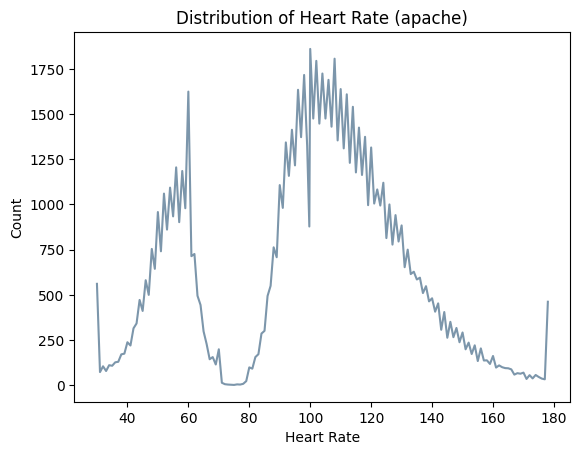

In [715]:
# Create a line plot to visualize the distribution of heart rate values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Heart Rate")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Heart Rate (apache)")

In [716]:
# How many times each unique value appears in intubated_apache column
value_counts = df['intubated_apache'].value_counts()

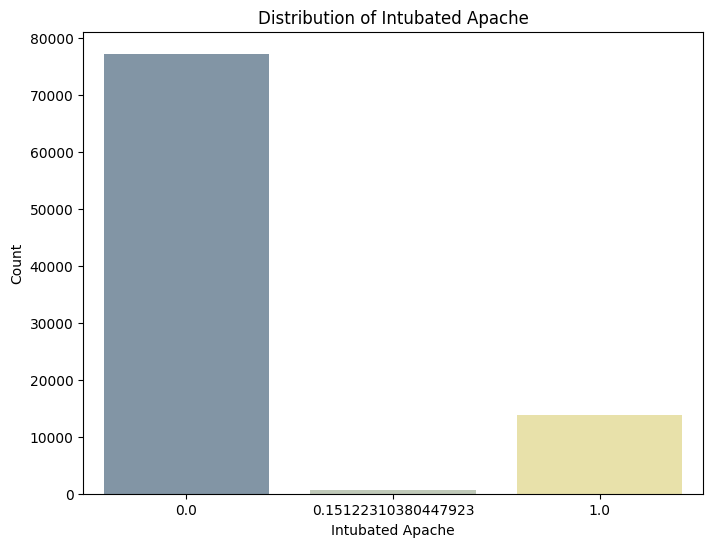

In [717]:
# Define a list of unique values in the 'intubated_apache' column
intubated_apache_values = df['intubated_apache'].value_counts().index.tolist()
# Define the corresponding counts for each value
value_counts = df['intubated_apache'].value_counts().values.tolist()

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a DataFrame for plotting
data = pd.DataFrame({'intubated_apache': intubated_apache_values, 'Count': value_counts})

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the distribution of 'intubated_apache' with the custom color palette
sns.barplot(x='intubated_apache', y='Count', data=data, palette=custom_palette, hue='intubated_apache', dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("Intubated Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Intubated Apache")

# Show the plot
plt.show()

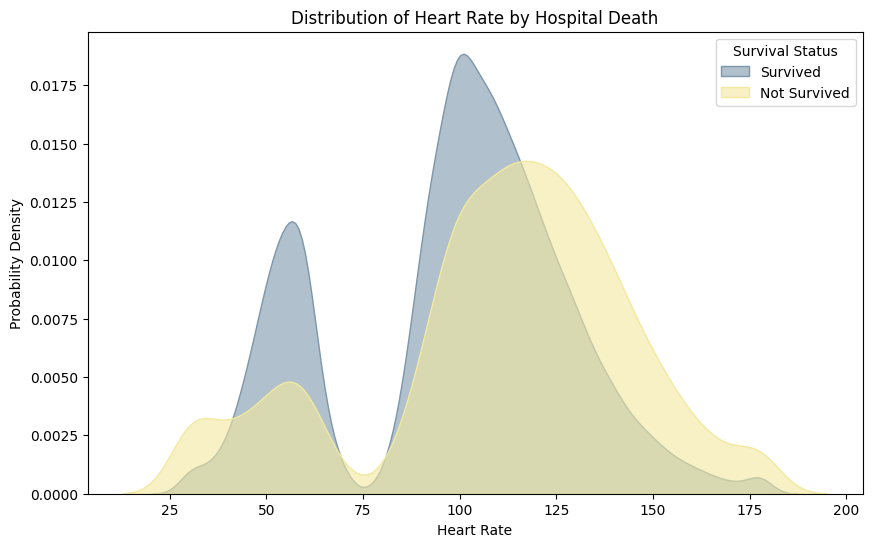

In [718]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a KDE plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['heart_rate_apache'], label='Survived', fill=True, color='#7C96AB', alpha=0.6)

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['heart_rate_apache'], label='Not Survived', fill=True, color='#F3E99F', alpha=0.6)

# Add a label to the x-axis
plt.xlabel('Heart Rate')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Heart Rate by Hospital Death')

# Add a legend
plt.legend(title='Survival Status')

# Show the plot
plt.show()

In [719]:
# How many times each unique value appears in map_apache column
value_counts = df['map_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Map (apache)')

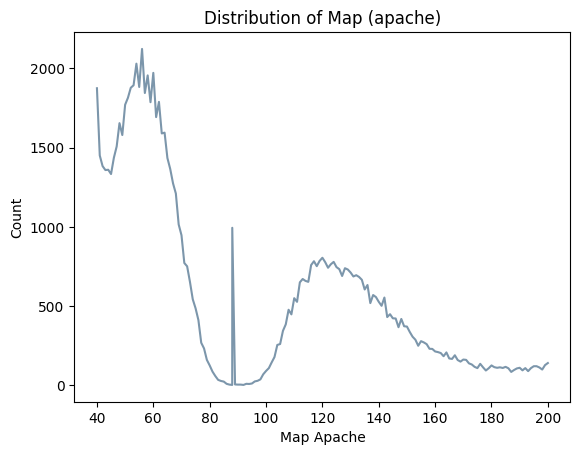

In [720]:
# Create a line plot to visualize the distribution of Map Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Map Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Map (apache)")

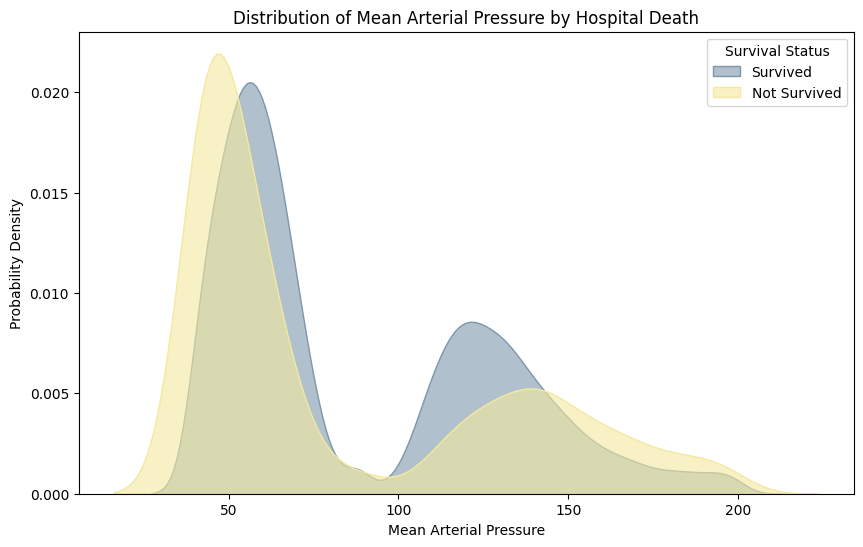

In [721]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a KDE plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['map_apache'], label='Survived', fill=True, color='#7C96AB', alpha=0.6)

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['map_apache'], label='Not Survived', fill=True, color='#F3E99F', alpha=0.6)

# Add a label to the x-axis
plt.xlabel('Mean Arterial Pressure')

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Mean Arterial Pressure by Hospital Death')

# Add a legend
plt.legend(title='Survival Status')

# Show the plot
plt.show()

In [722]:
# How many times each unique value appears in resprate_apache column
value_counts = df['resprate_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Resprat (apache)')

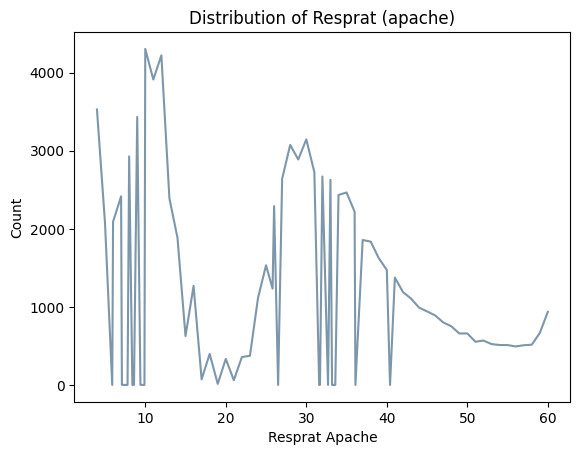

In [723]:
# Create a line plot to visualize the distribution of Resprat Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Resprat Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Resprat (apache)")

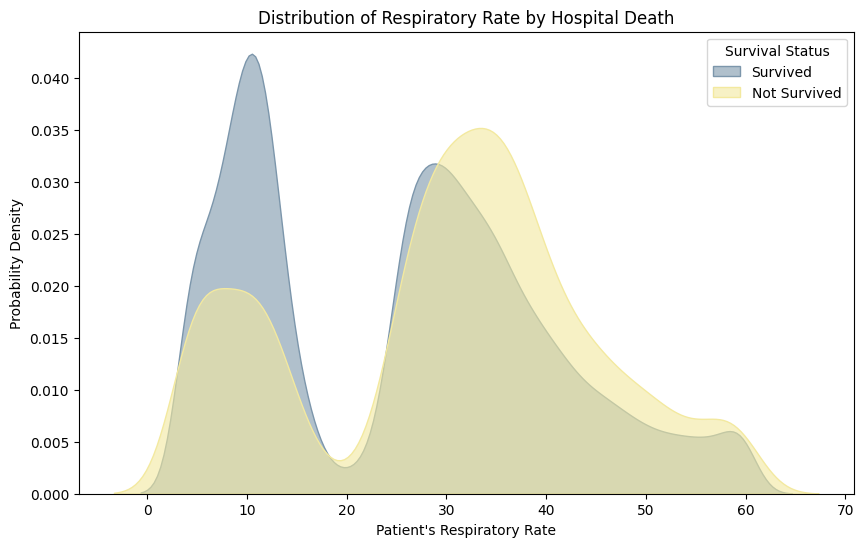

In [724]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a KDE plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['resprate_apache'], label='Survived', fill=True, color='#7C96AB', alpha=0.6)

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['resprate_apache'], label='Not Survived', fill=True, color='#F3E99F', alpha=0.6)

# Add a label to the x-axis
plt.xlabel("Patient's Respiratory Rate")

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Respiratory Rate by Hospital Death')

# Add a legend
plt.legend(title='Survival Status')

# Show the plot
plt.show()

In [725]:
# How many times each unique value appears in temp_apache column
value_counts = df['temp_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Temp (apache)')

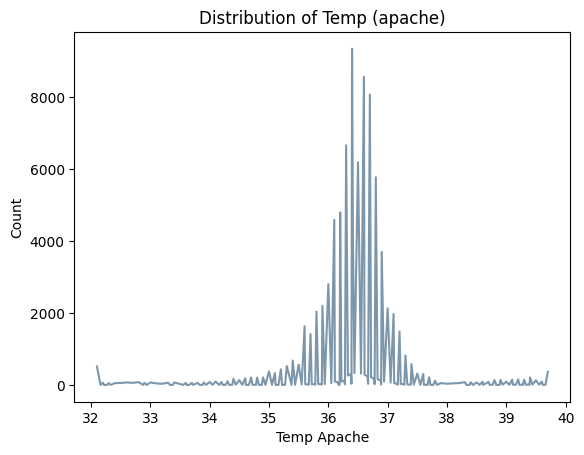

In [726]:
# Create a line plot to visualize the distribution of Temp Apache values
sns.lineplot(x=value_counts.index, y=value_counts.values, color="#7C96AB")

# Add a label to the x-axis
plt.xlabel("Temp Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Temp (apache)")

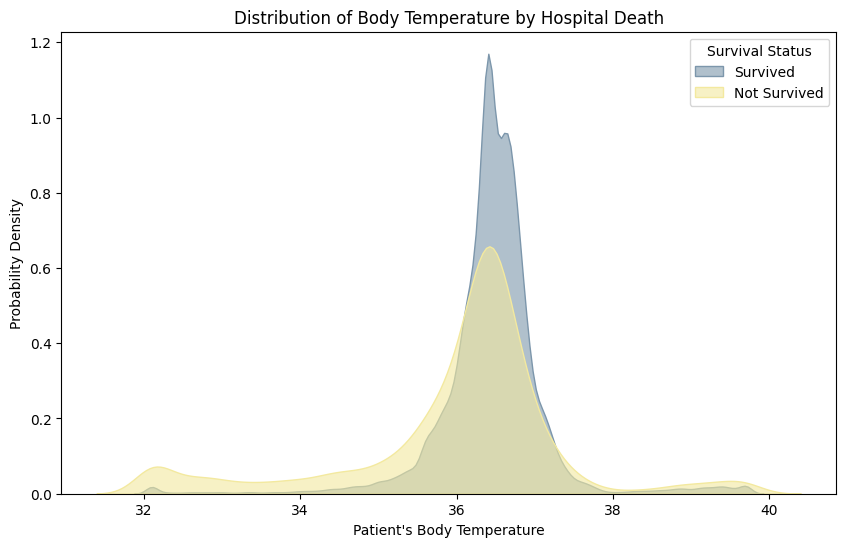

In [727]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a KDE plot for patients who survived (hospital_death == 0)
sns.kdeplot(data=df[df['hospital_death'] == 0]['temp_apache'], label='Survived', fill=True, color='#7C96AB', alpha=0.6)

# Create a KDE plot for patients who did not survive (hospital_death == 1)
sns.kdeplot(data=df[df['hospital_death'] == 1]['temp_apache'], label='Not Survived', fill=True, color='#F3E99F', alpha=0.6)

# Add a label to the x-axis
plt.xlabel("Patient's Body Temperature")

# Add a label to the y-axis
plt.ylabel('Probability Density')

# Set the title of the plot
plt.title('Distribution of Body Temperature by Hospital Death')

# Add a legend
plt.legend(title='Survival Status')

# Show the plot
plt.show()

In [728]:
# How many times each unique value appears in ventilated_apache column
df['ventilated_apache'].value_counts()

ventilated_apache
0.000000    61358
1.000000    29640
0.325721      715
Name: count, dtype: int64

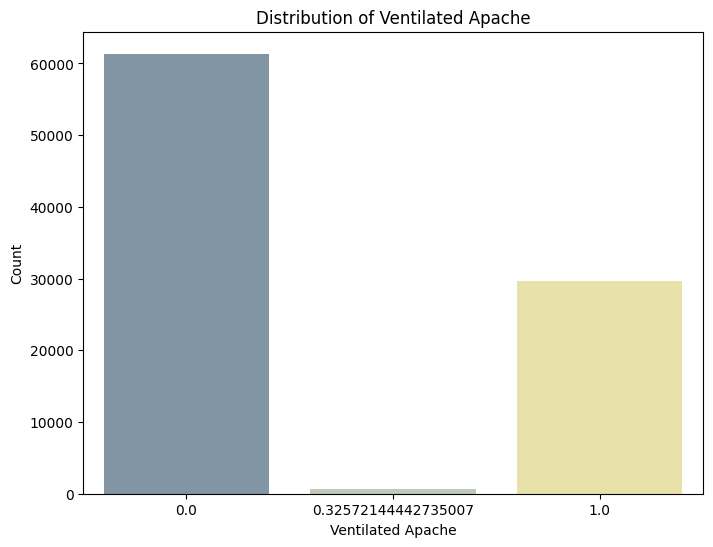

In [729]:
# Define unique values and their counts for the 'ventilated_apache' column
ventilated_apache_values = df['ventilated_apache'].value_counts().index.tolist()
value_counts = df['ventilated_apache'].value_counts().values.tolist()

# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a DataFrame for plotting
data = pd.DataFrame({'ventilated_apache': ventilated_apache_values, 'Count': value_counts})

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the distribution of 'ventilated_apache' with the custom color palette
sns.barplot(x='ventilated_apache', y='Count', data=data, palette=custom_palette, hue='ventilated_apache', dodge=False, legend=False)

# Add a label to the x-axis
plt.xlabel("Ventilated Apache")

# Add a label to the y-axis
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Ventilated Apache")

# Show the plot
plt.show()

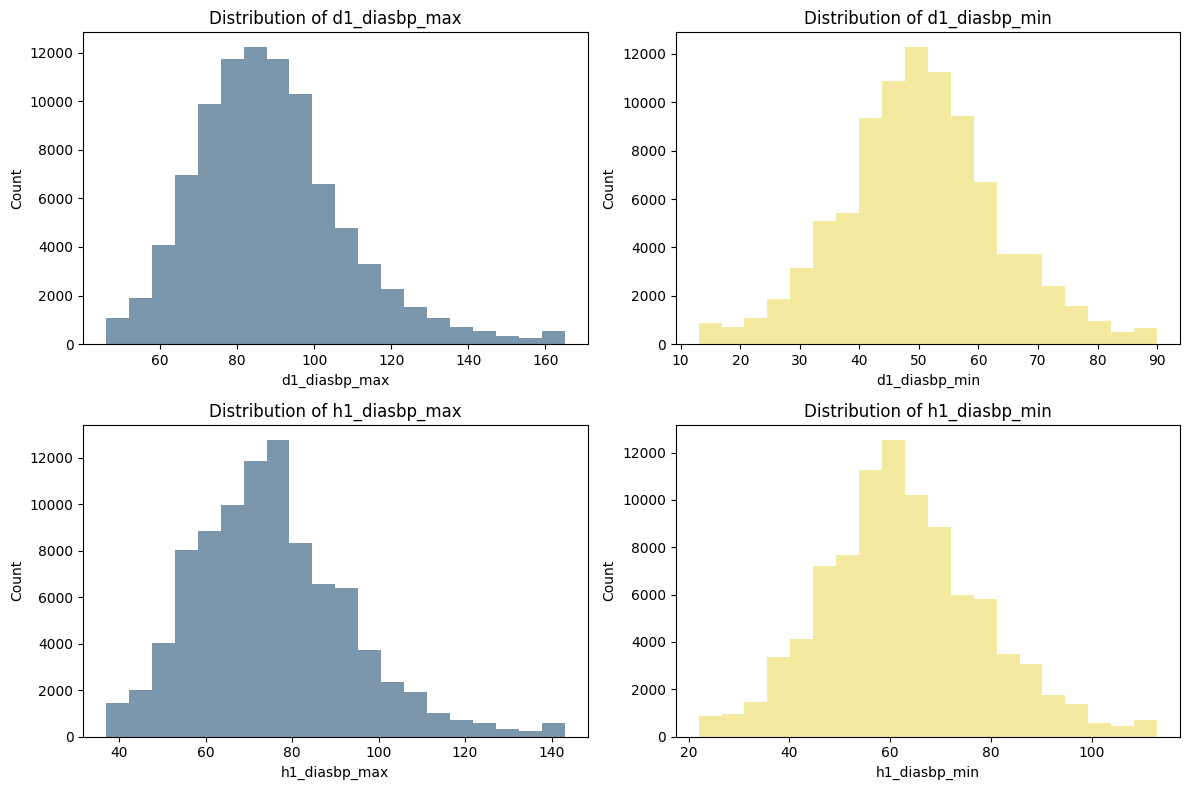

In [730]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_diasbp_max in the first subplot
axes[0, 0].hist(df['d1_diasbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_diasbp_max')
axes[0, 0].set_xlabel('d1_diasbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_diasbp_min in the second subplot
axes[0, 1].hist(df['d1_diasbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_diasbp_min')
axes[0, 1].set_xlabel('d1_diasbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_diasbp_max in the third subplot
axes[1, 0].hist(df['h1_diasbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_diasbp_max')
axes[1, 0].set_xlabel('h1_diasbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_diasbp_min in the third subplot
axes[1, 1].hist(df['h1_diasbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_diasbp_min')
axes[1, 1].set_xlabel('h1_diasbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

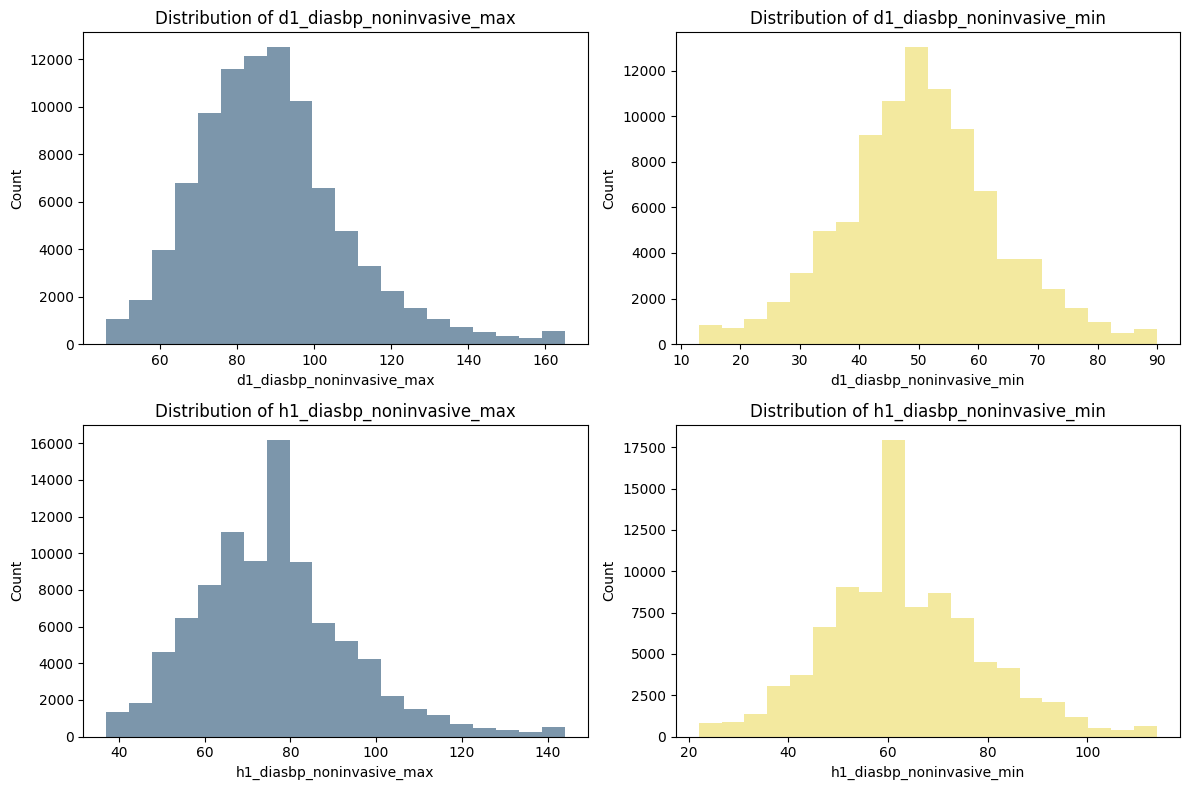

In [731]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_diasbp_noninvasive_max in the first subplot
axes[0, 0].hist(df['d1_diasbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_diasbp_noninvasive_max')
axes[0, 0].set_xlabel('d1_diasbp_noninvasive_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_diasbp_noninvasive_min in the second subplot
axes[0, 1].hist(df['d1_diasbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_diasbp_noninvasive_min')
axes[0, 1].set_xlabel('d1_diasbp_noninvasive_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_diasbp_noninvasive_max in the third subplot
axes[1, 0].hist(df['h1_diasbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_diasbp_noninvasive_max')
axes[1, 0].set_xlabel('h1_diasbp_noninvasive_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_diasbp_noninvasive_min in the third subplot
axes[1, 1].hist(df['h1_diasbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_diasbp_noninvasive_min')
axes[1, 1].set_xlabel('h1_diasbp_noninvasive_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

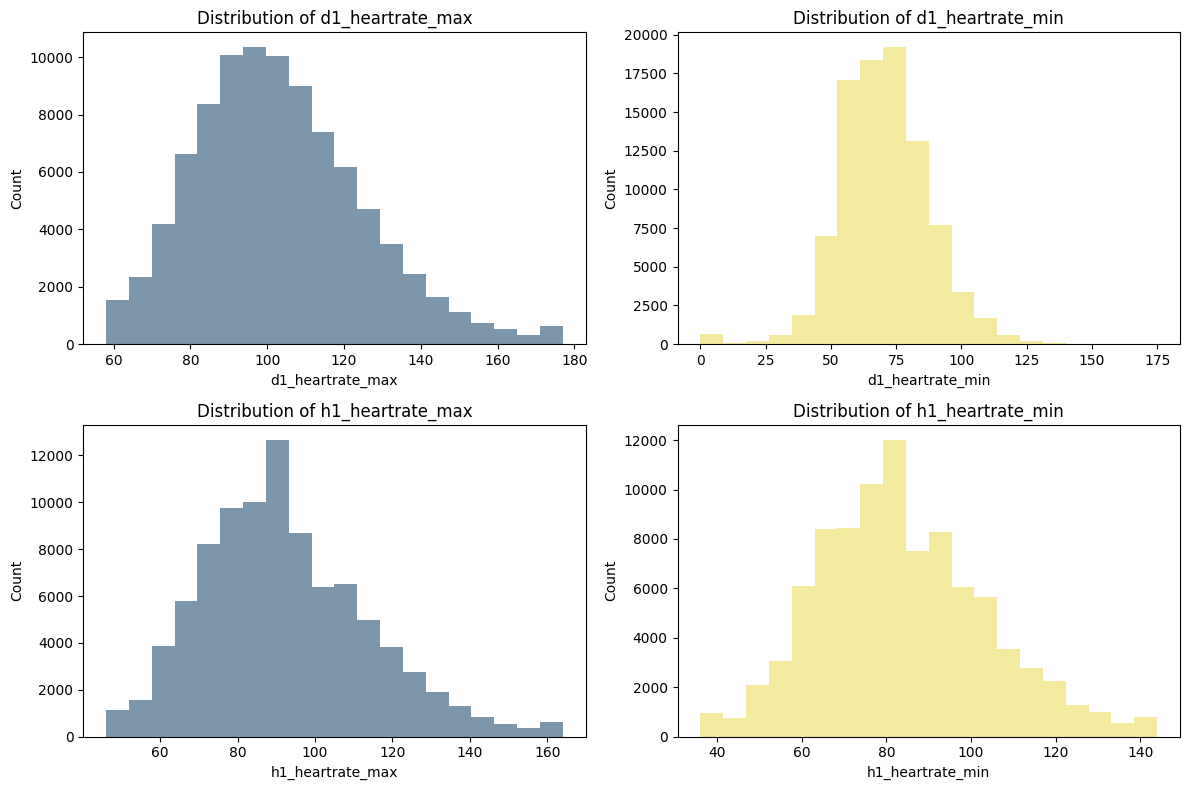

In [732]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_heartrate_max in the first subplot
axes[0, 0].hist(df['d1_heartrate_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_heartrate_max')
axes[0, 0].set_xlabel('d1_heartrate_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_heartrate_min in the second subplot
axes[0, 1].hist(df['d1_heartrate_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_heartrate_min')
axes[0, 1].set_xlabel('d1_heartrate_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_heartrate_max in the third subplot
axes[1, 0].hist(df['h1_heartrate_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_heartrate_max')
axes[1, 0].set_xlabel('h1_heartrate_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_heartrate_min in the third subplot
axes[1, 1].hist(df['h1_heartrate_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_heartrate_min')
axes[1, 1].set_xlabel('h1_heartrate_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

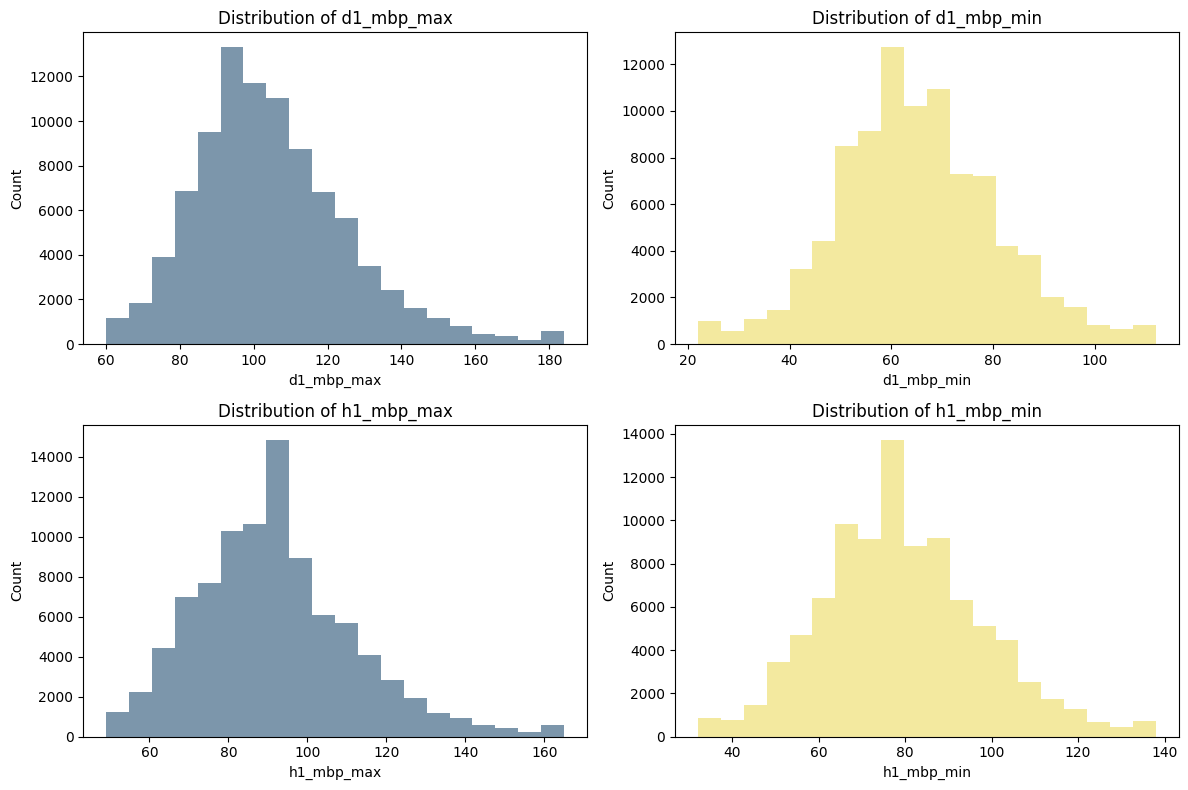

In [733]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_mbp_max in the first subplot
axes[0, 0].hist(df['d1_mbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_mbp_max')
axes[0, 0].set_xlabel('d1_mbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_mbp_min in the second subplot
axes[0, 1].hist(df['d1_mbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_mbp_min')
axes[0, 1].set_xlabel('d1_mbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_mbp_max in the third subplot
axes[1, 0].hist(df['h1_mbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_mbp_max')
axes[1, 0].set_xlabel('h1_mbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_mbp_min in the third subplot
axes[1, 1].hist(df['h1_mbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_mbp_min')
axes[1, 1].set_xlabel('h1_mbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

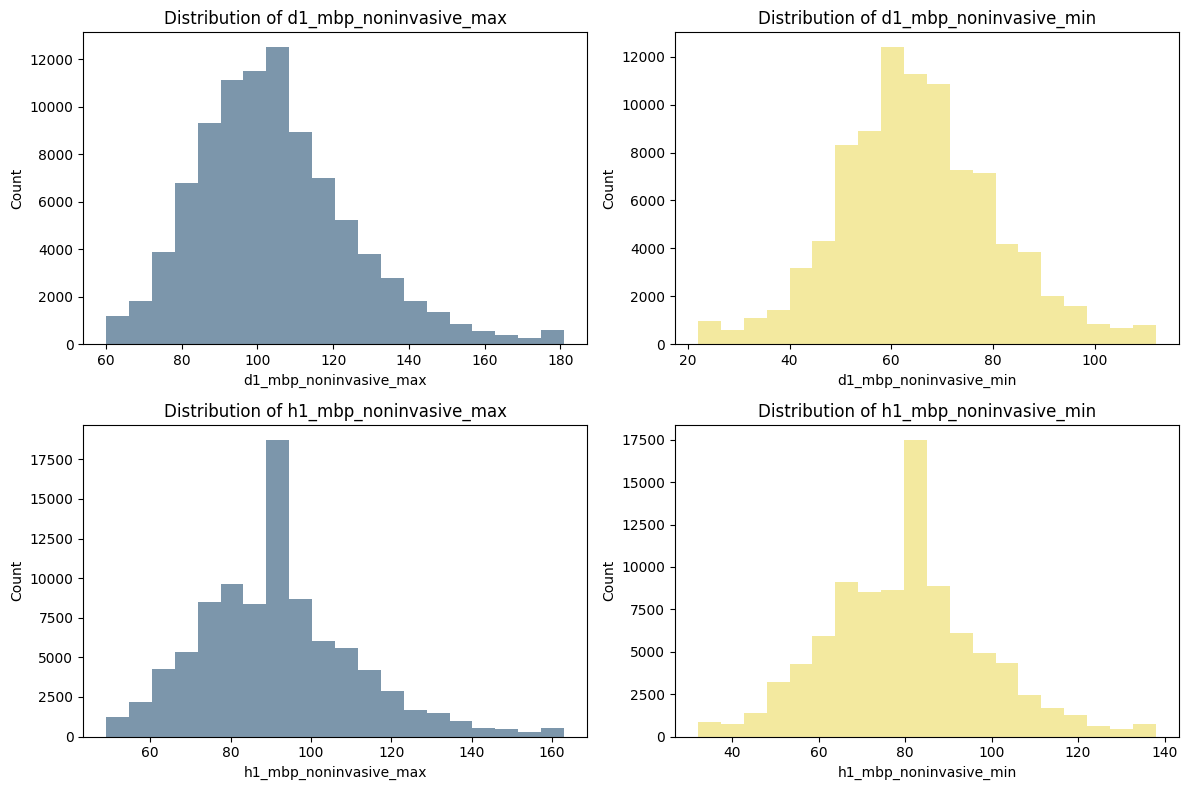

In [734]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_mbp_noninvasive_max in the first subplot
axes[0, 0].hist(df['d1_mbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_mbp_noninvasive_max')
axes[0, 0].set_xlabel('d1_mbp_noninvasive_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_mbp_noninvasive_min in the second subplot
axes[0, 1].hist(df['d1_mbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_mbp_noninvasive_min')
axes[0, 1].set_xlabel('d1_mbp_noninvasive_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_mbp_noninvasive_max in the third subplot
axes[1, 0].hist(df['h1_mbp_noninvasive_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_mbp_noninvasive_max')
axes[1, 0].set_xlabel('h1_mbp_noninvasive_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_mbp_noninvasive_min in the third subplot
axes[1, 1].hist(df['h1_mbp_noninvasive_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_mbp_noninvasive_min')
axes[1, 1].set_xlabel('h1_mbp_noninvasive_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

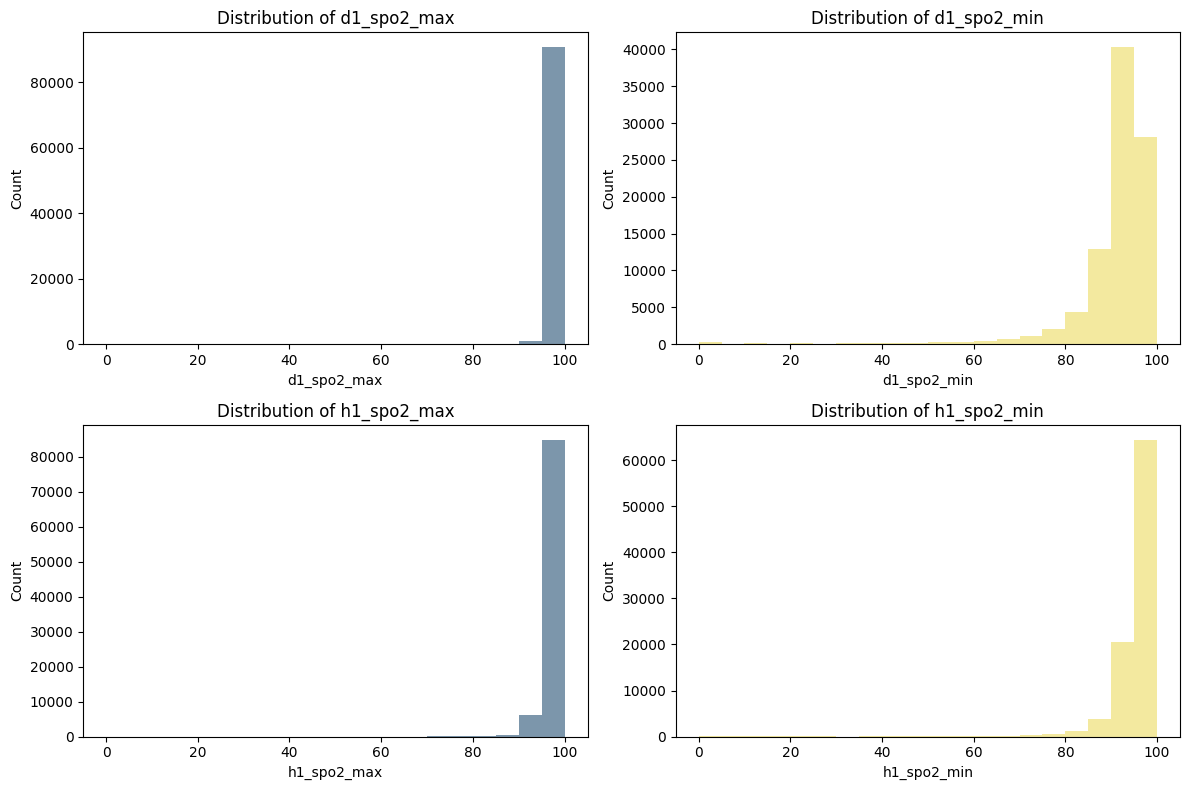

In [735]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_spo2_max in the first subplot
axes[0, 0].hist(df['d1_spo2_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_spo2_max')
axes[0, 0].set_xlabel('d1_spo2_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_spo2_min in the second subplot
axes[0, 1].hist(df['d1_spo2_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_spo2_min')
axes[0, 1].set_xlabel('d1_spo2_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_spo2_max in the third subplot
axes[1, 0].hist(df['h1_spo2_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_spo2_max')
axes[1, 0].set_xlabel('h1_spo2_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_spo2_min in the third subplot
axes[1, 1].hist(df['h1_spo2_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_spo2_min')
axes[1, 1].set_xlabel('h1_spo2_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

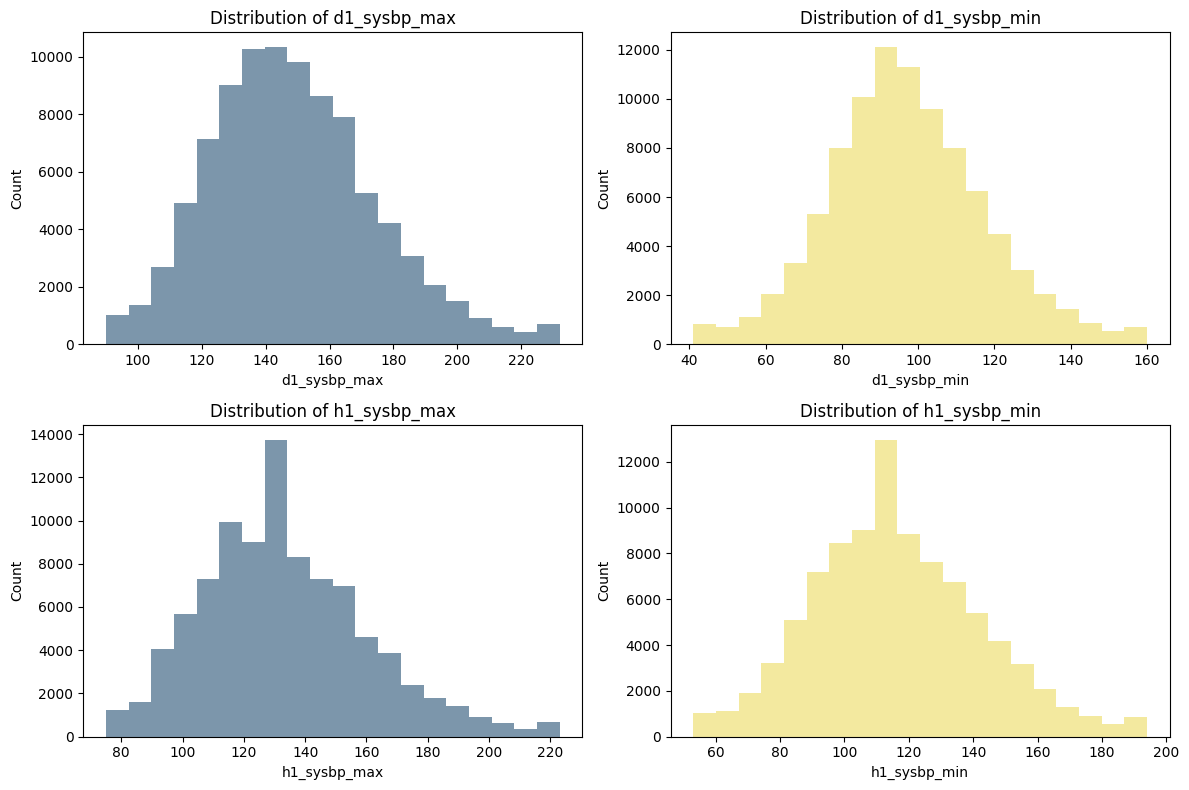

In [736]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # Add a closing parenthesis here

# Plot d1_sysbp_max in the first subplot
axes[0, 0].hist(df['d1_sysbp_max'].dropna(), bins=20, color='#7C96AB')
axes[0, 0].set_title('Distribution of d1_sysbp_max')
axes[0, 0].set_xlabel('d1_sysbp_max')
axes[0, 0].set_ylabel('Count')

# Plot d1_sysbp_min in the second subplot
axes[0, 1].hist(df['d1_sysbp_min'].dropna(), bins=20, color='#F3E99F')
axes[0, 1].set_title('Distribution of d1_sysbp_min')
axes[0, 1].set_xlabel('d1_sysbp_min')
axes[0, 1].set_ylabel('Count')

# Plot h1_sysbp_max in the third subplot
axes[1, 0].hist(df['h1_sysbp_max'].dropna(), bins=20, color='#7C96AB')
axes[1, 0].set_title('Distribution of h1_sysbp_max')
axes[1, 0].set_xlabel('h1_sysbp_max')
axes[1, 0].set_ylabel('Count')

# Plot h1_sysbp_min in the third subplot
axes[1, 1].hist(df['h1_sysbp_min'].dropna(), bins=20, color='#F3E99F')
axes[1, 1].set_title('Distribution of h1_sysbp_min')
axes[1, 1].set_xlabel('h1_sysbp_min')
axes[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

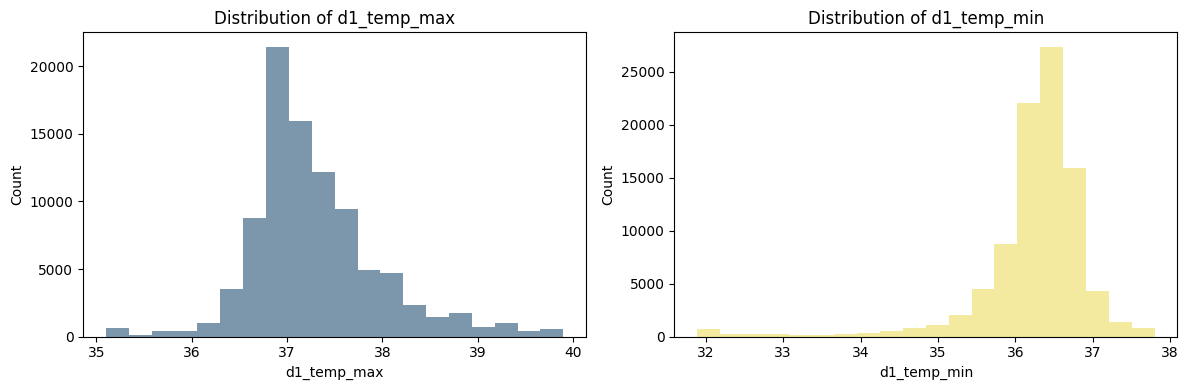

In [737]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_temp_max in the first subplot
axes[0].hist(df['d1_temp_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_temp_max')
axes[0].set_xlabel('d1_temp_max')
axes[0].set_ylabel('Count')

# Plot d1_temp_min in the second subplot
axes[1].hist(df['d1_temp_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_temp_min')
axes[1].set_xlabel('d1_temp_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

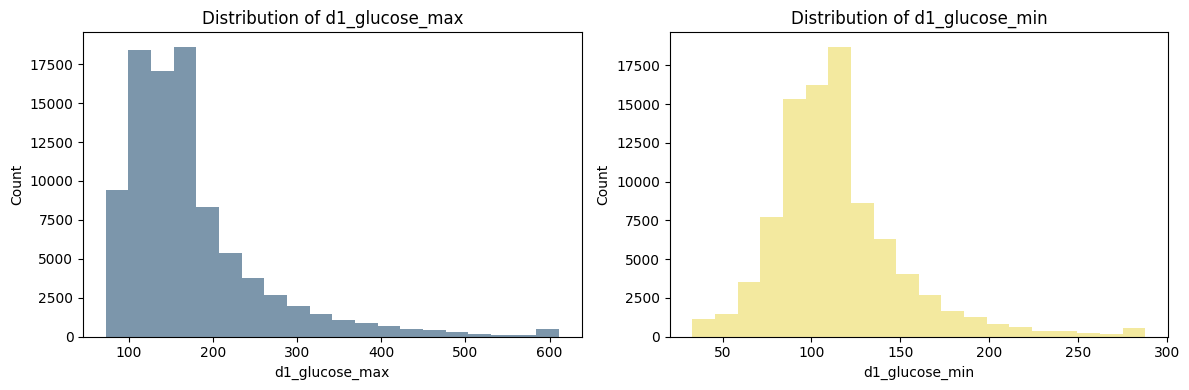

In [738]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_glucose_max in the first subplot
axes[0].hist(df['d1_glucose_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_glucose_max')
axes[0].set_xlabel('d1_glucose_max')
axes[0].set_ylabel('Count')

# Plot d1_glucose_min in the second subplot
axes[1].hist(df['d1_glucose_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_glucose_min')
axes[1].set_xlabel('d1_glucose_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

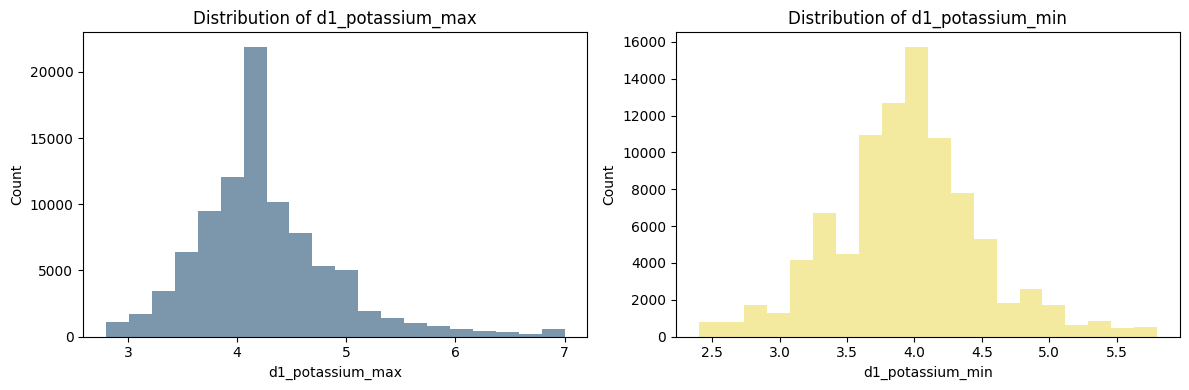

In [739]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot d1_potassium_max in the first subplot
axes[0].hist(df['d1_potassium_max'].dropna(), bins=20, color='#7C96AB')
axes[0].set_title('Distribution of d1_potassium_max')
axes[0].set_xlabel('d1_potassium_max')
axes[0].set_ylabel('Count')

# Plot d1_potassium_min in the second subplot
axes[1].hist(df['d1_potassium_min'].dropna(), bins=20, color='#F3E99F')
axes[1].set_title('Distribution of d1_potassium_min')
axes[1].set_xlabel('d1_potassium_min')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

Text(0.5, 1.0, 'Correlation: 0.88')

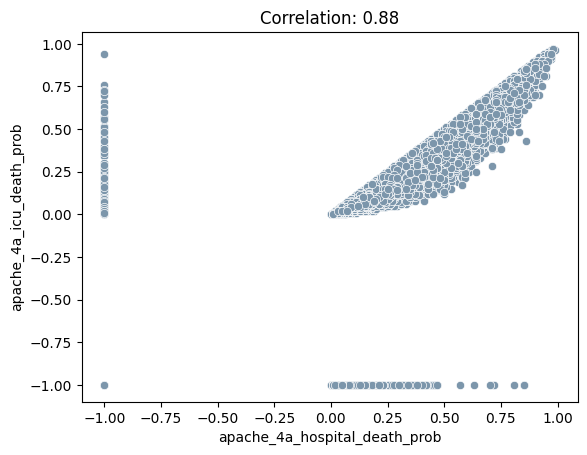

In [740]:
# Create a scatter plot
sns.scatterplot(data=df, x='apache_4a_hospital_death_prob', y='apache_4a_icu_death_prob', color='#7C96AB')

# Add a label to the x-axis
plt.xlabel('apache_4a_hospital_death_prob')

# Add a label to the y-axis
plt.ylabel('apache_4a_icu_death_prob')

# Calculate the correlation coefficient between the two variables
correlation = df['apache_4a_hospital_death_prob'].corr(df['apache_4a_icu_death_prob'])

# Set the plot's title to display the calculated correlation
plt.title(f'Correlation: {correlation:.2f}')

In [741]:
# How many times each unique value appears in aids column
df['aids'].value_counts()

aids
0.000000    90920
0.000857      715
1.000000       78
Name: count, dtype: int64

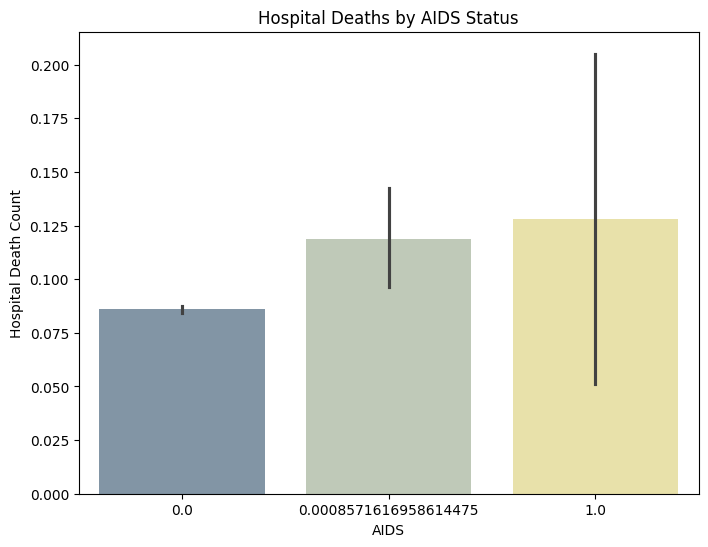

In [742]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn
sns.barplot(data=df, x='aids', y='hospital_death', hue='aids', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('AIDS')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by AIDS Status')

# Show the plot
plt.show()

In [743]:
# How many times each unique value appears in cirrhosis column
df['cirrhosis'].value_counts()

cirrhosis
0.000000    89570
1.000000     1428
0.015693      715
Name: count, dtype: int64

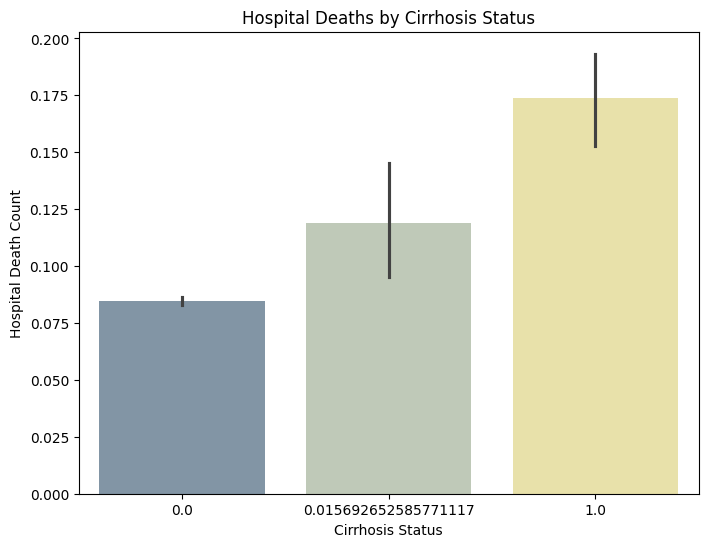

In [744]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, setting `hue` to avoid warnings
sns.barplot(data=df, x='cirrhosis', y='hospital_death', hue='cirrhosis', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Cirrhosis Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Cirrhosis Status')

# Show the plot
plt.show()

In [745]:
# How many times each unique value appears in diabetes_mellitus column
df['diabetes_mellitus'].value_counts()

diabetes_mellitus
0.000000    70506
1.000000    20492
0.225192      715
Name: count, dtype: int64

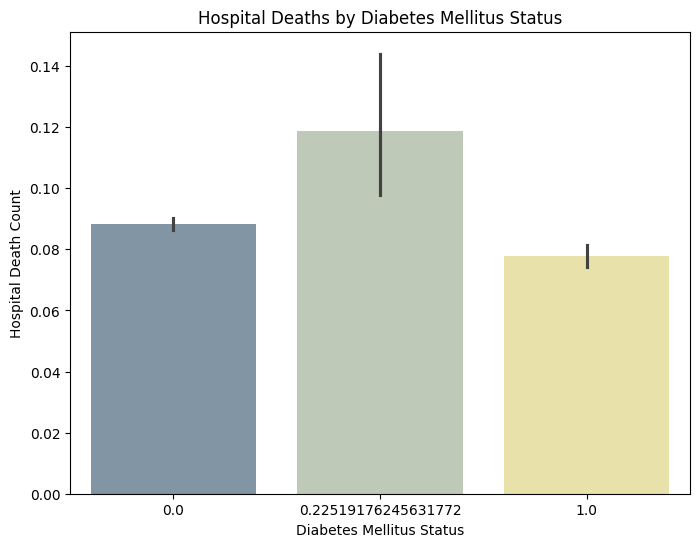

In [746]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, setting `hue` to avoid warnings
sns.barplot(data=df, x='diabetes_mellitus', y='hospital_death', hue='diabetes_mellitus', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Diabetes Mellitus Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Diabetes Mellitus Status')

# Show the plot
plt.show()

In [747]:
# How many times each unique value appears in hepatic_failure column
df['hepatic_failure'].value_counts()

hepatic_failure
0.000000    89816
1.000000     1182
0.012989      715
Name: count, dtype: int64

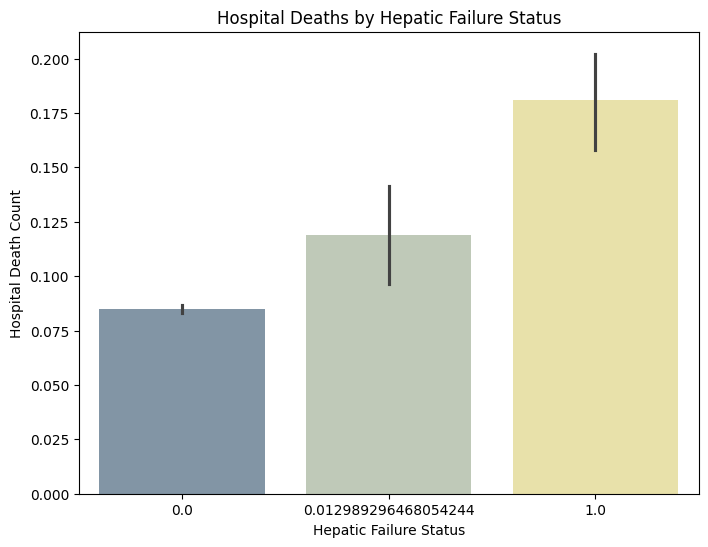

In [748]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, setting `hue` to avoid warnings
sns.barplot(data=df, x='hepatic_failure', y='hospital_death', hue='hepatic_failure', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Hepatic Failure Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Hepatic Failure Status')

# Show the plot
plt.show()

In [749]:
# How many times each unique value appears in immunosuppression column
df['immunosuppression'].value_counts()

immunosuppression
0.000000    88617
1.000000     2381
0.026165      715
Name: count, dtype: int64

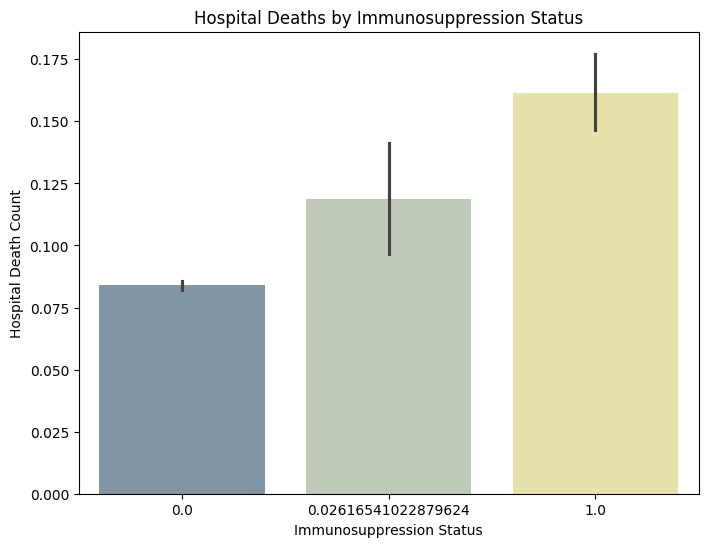

In [750]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, setting `hue` to avoid warnings
sns.barplot(data=df, x='immunosuppression', y='hospital_death', hue='immunosuppression', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Immunosuppression Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Immunosuppression Status')

# Show the plot
plt.show()

In [751]:
# How many times each unique value appears in leukemia column
df['leukemia'].value_counts()

leukemia
0.000000    90355
0.007066      715
1.000000      643
Name: count, dtype: int64

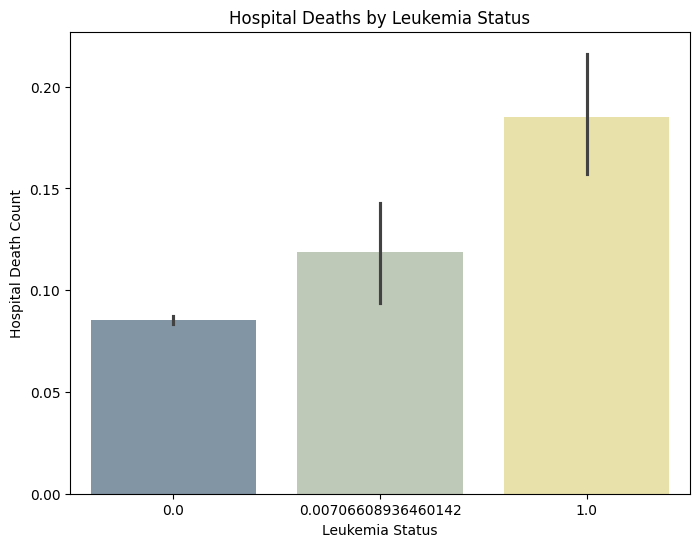

In [752]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, setting `hue` to avoid warnings
sns.barplot(data=df, x='leukemia', y='hospital_death', hue='leukemia', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Leukemia Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Leukemia Status')

# Show the plot
plt.show()

In [753]:
# How many times each unique value appears in lymphoma column
df['lymphoma'].value_counts()

lymphoma
0.000000    90622
0.004132      715
1.000000      376
Name: count, dtype: int64

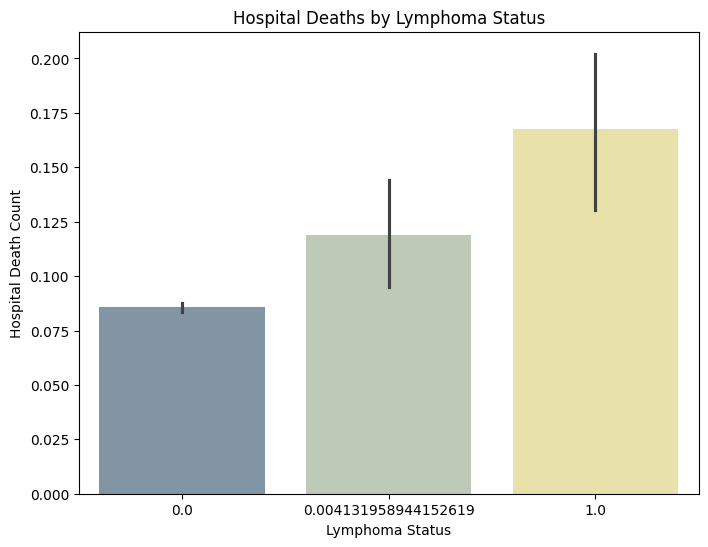

In [754]:
# Define a custom color palette with hexadecimal color codes
custom_palette = ["#7C96AB", "#BFCCB5", "#F3E99F"]

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, specifying `hue` to avoid the warning
sns.barplot(data=df, x='lymphoma', y='hospital_death', hue='lymphoma', palette=custom_palette, dodge=False, legend=False)

# Label the x-axis
plt.xlabel('Lymphoma Status')

# Label the y-axis
plt.ylabel('Hospital Death Count')

# Set the title of the plot
plt.title('Hospital Deaths by Lymphoma Status')

# Show the plot
plt.show()

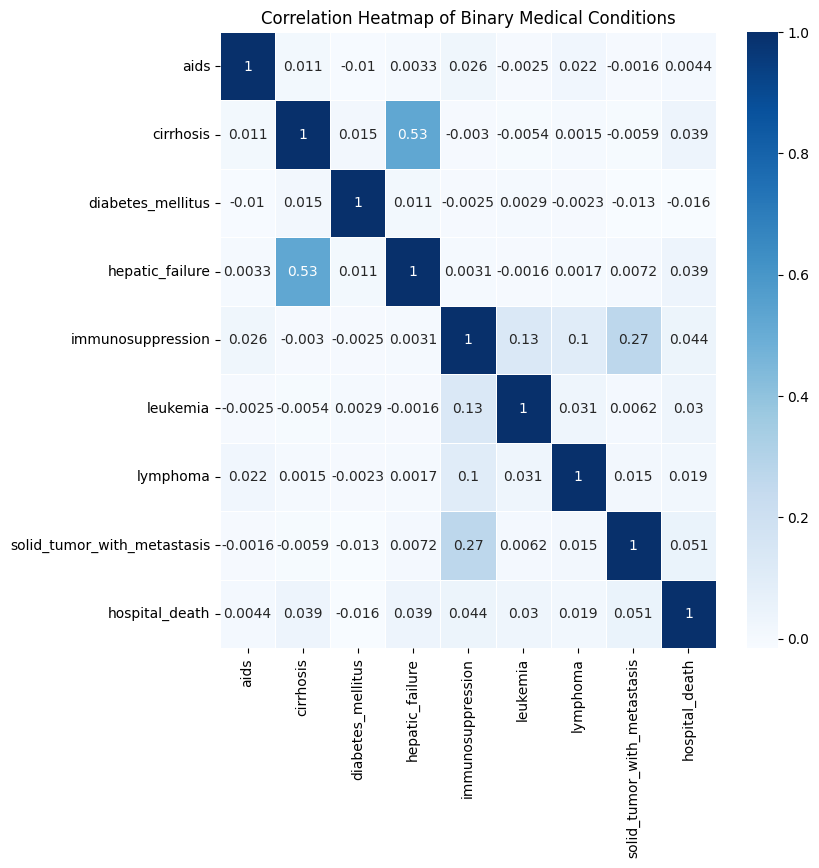

In [755]:
# Select the binary columns
binary_columns = df[['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']]

# Calculate the correlation matrix
correlation_matrix = binary_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Binary Medical Conditions')

# Show the plot
plt.show()

In [756]:
df["apache_2_bodysystem"].value_counts()

apache_2_bodysystem
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: count, dtype: int64

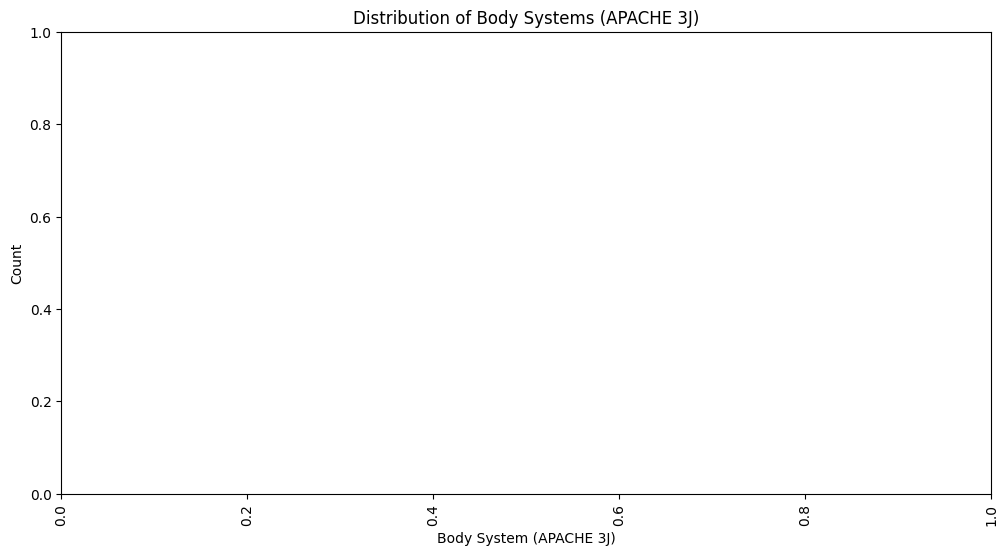

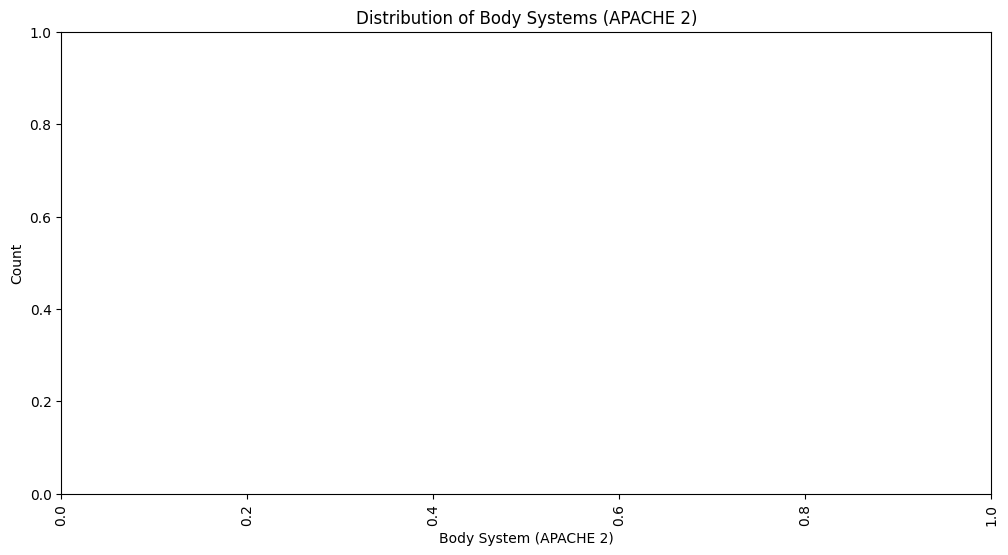

In [802]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define an expanded custom color palette with enough distinct colors for the plot
expanded_palette = ['#FF6D60', '#F7D060', '#F3E99F', '#7C96AB', '#BFCCB5', '#98D8AA', '#B7B7B7', '#FFC1A1', '#D3A588', '#7A9E9F', '#5B5656']

# Count the occurrences of each 'apache_3j_bodysystem' category
bodysystem_counts = df['apache_3j_bodysystem'].value_counts().reset_index()
bodysystem_counts.columns = ['apache_3j_bodysystem', 'Count']

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each bar individually with a color from the palette
for i, (bodysystem, count) in enumerate(zip(bodysystem_counts['apache_3j_bodysystem'], bodysystem_counts['Count'])):
    plt.bar(bodysystem, count, color=expanded_palette[i % len(expanded_palette)])  # Cycle through colors if needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Body System (APACHE 3J)')
plt.ylabel('Count')
plt.title('Distribution of Body Systems (APACHE 3J)')

# Show the plot
plt.show()

# Automatically generate a color palette with enough distinct colors for 'apache_2_bodysystem'
num_unique_bodysystems = len(df['apache_2_bodysystem'].unique())
custom_palette = sns.color_palette("husl", num_unique_bodysystems)  # Generates distinct colors

# Count occurrences of each 'apache_2_bodysystem' category
bodysystem_counts = df['apache_2_bodysystem'].value_counts().reset_index()
bodysystem_counts.columns = ['apache_2_bodysystem', 'Count']

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each category individually with a specific color from the generated palette
for i, (bodysystem, count) in enumerate(zip(bodysystem_counts['apache_2_bodysystem'], bodysystem_counts['Count'])):
    plt.bar(bodysystem, count, color=custom_palette[i % len(custom_palette)])  # Cycle colors if needed

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Body System (APACHE 2)')
plt.ylabel('Count')
plt.title('Distribution of Body Systems (APACHE 2)')

# Show the plot
plt.show()

In [803]:
# Mapping values for categorical columns in the DataFrame
df["ethnicity"] = df["ethnicity"].map({
    "Caucasian": 0,
    "African American": 1,
    "Other/Unknown": 2,
    "Hispanic": 3,
    "Asian": 4,
    "Native American": 5
})

df["gender"] = df["gender"].map({
    "M": 0,
    "F": 1
})

df["icu_admit_source"] = df["icu_admit_source"].map({
    "Accident & Emergency": 0,
    "Operating Room / Recovery": 1,
    "Floor": 2,
    "Other Hospital": 3,
    "Other ICU": 4
})

df["icu_stay_type"] = df["icu_stay_type"].map({
    "admit": 0,
    "transfer": 1,
    "readmit": 2
})

df["icu_type"] = df["icu_type"].map({
    "Med-Surg ICU": 0,
    "MICU": 1,
    "Neuro ICU": 2,
    "CCU-CTICU": 3,
    "SICU": 4,
    "Cardiac ICU": 5,
    "CSICU": 6,
    "CTICU": 7
})

df["apache_3j_bodysystem"] = df["apache_3j_bodysystem"].map({
    "Cardiovascular": 0,
    "Neurological": 1,
    "Sepsis": 2,
    "Respiratory": 3,
    "Gastrointestinal": 4,
    "Metabolic": 5,
    "Trauma": 6,
    "Genitourinary": 7,
    "Musculoskeletal/Skin": 8,
    "Hematological": 9,
    "Gynecological": 10
})

df["apache_2_bodysystem"] = df["apache_2_bodysystem"].map({
    "Cardiovascular": 0,
    "Neurologic": 1,
    "Respiratory": 2,
    "Gastrointestinal": 3,
    "Metabolic": 4,
    "Trauma": 5,
    "Undefined diagnoses": 6,
    "Renal/Genitourinary": 7,
    "Haematologic": 8,
    "Undefined Diagnoses": 9
})

# Machine Learning Models

In [804]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1- Logistic Regression

In [805]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

In [806]:
# Split the data into features (X) and the target variable (y).
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [807]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [853]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Remove columns with all missing values in X_train
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')  # Also apply to X_test to ensure consistent columns

# Identify numeric and categorical columns after dropping completely missing columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define imputers for numeric and categorical features
numeric_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the full pipeline with preprocessing and logistic regression
LR_model = make_pipeline(preprocessor, LogisticRegression(max_iter=200))

# Fit the model to the training data
LR_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_ap...
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=200))])

In [854]:
LR_y_pred = LR_model.predict(X_test)

In [855]:
# Confusion matrix
LR_confusion = confusion_matrix(y_test, LR_y_pred)

# Classification report
LR_classification_rep = classification_report(y_test, LR_y_pred)

# Accuracy score
LR_accuracy = accuracy_score(y_test, LR_y_pred)

print("Logistic Regression Confusion Matrix:\n", LR_confusion)
print("\nLogistic Regression Classification Report:\n", LR_classification_rep)
print("\nLogistic Regression Accuracy:", LR_accuracy)

Logistic Regression Confusion Matrix:
 [[16526   230]
 [ 1200   387]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     16756
           1       0.63      0.24      0.35      1587

    accuracy                           0.92     18343
   macro avg       0.78      0.62      0.65     18343
weighted avg       0.91      0.92      0.91     18343


Logistic Regression Accuracy: 0.9220411055988661


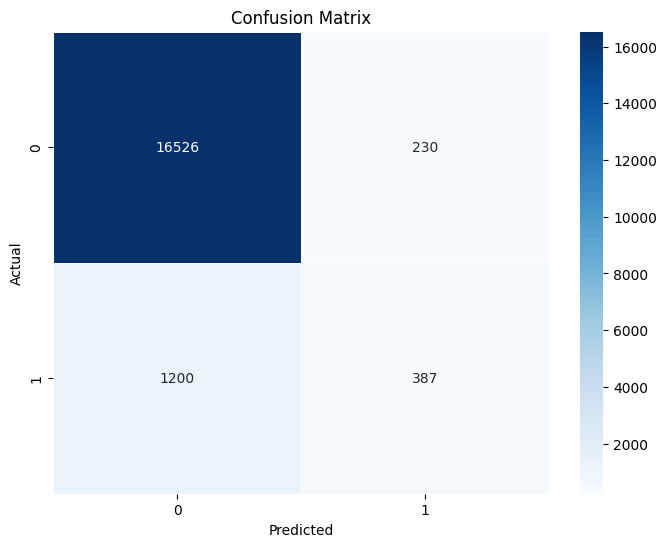

In [856]:
# Confusion matrix
confusion = confusion_matrix(y_test, LR_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2- Decision Tree

In [857]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [858]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [859]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [860]:
# Create and fit a decision tree classifier
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [861]:
# Make predictions using the test set
DT_y_pred = DT_model.predict(X_test)

In [862]:
# Evaluate the model's performance
DT_accuracy = accuracy_score(y_test, DT_y_pred)
DT_classification_rep = classification_report(y_test, DT_y_pred)
DT_confusion = confusion_matrix(y_test, DT_y_pred)

# Print the results
print("Decision Tree Accuracy:", DT_accuracy)
print("\nDecision Tree Classification Report:\n", DT_classification_rep)
print("\nDecision Tree Confusion Matrix:\n", DT_confusion)

Decision Tree Accuracy: 0.8771738537861855

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     16756
           1       0.31      0.35      0.33      1587

    accuracy                           0.88     18343
   macro avg       0.62      0.64      0.63     18343
weighted avg       0.88      0.88      0.88     18343


Decision Tree Confusion Matrix:
 [[15540  1216]
 [ 1037   550]]


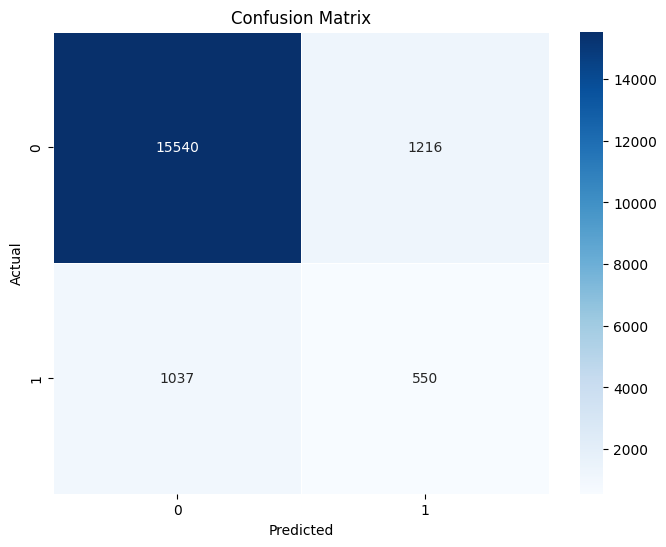

In [863]:
# Confusion matrix
DT_confusion = confusion_matrix(y_test, DT_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3- Random Forest

In [864]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [865]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [866]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [867]:
# Create and fit a Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [868]:
# Make predictions using the test set
RF_y_pred = RF_model.predict(X_test)

In [869]:
# Evaluate the model's performance
RF_accuracy = accuracy_score(y_test, RF_y_pred)
RF_classification_rep = classification_report(y_test, RF_y_pred)
RF_confusion = confusion_matrix(y_test, RF_y_pred)

# Print the results
print("Random Forest Accuracy:", RF_accuracy)
print("\nRandom Forest Classification Report:\n", RF_classification_rep)
print("\nRandom Forest Confusion Matrix:\n", RF_confusion)

Random Forest Accuracy: 0.9273837431172655

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     16756
           1       0.70      0.28      0.40      1587

    accuracy                           0.93     18343
   macro avg       0.82      0.63      0.68     18343
weighted avg       0.92      0.93      0.91     18343


Random Forest Confusion Matrix:
 [[16571   185]
 [ 1147   440]]


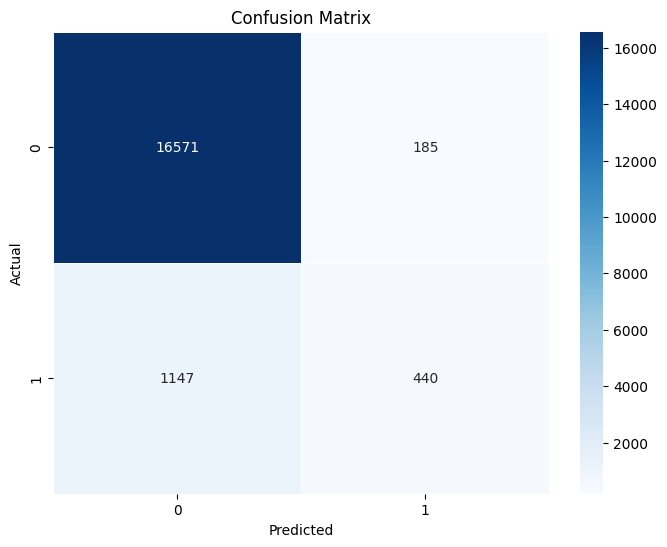

In [870]:
# Confusion matrix
RF_confusion = confusion_matrix(y_test, RF_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(RF_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4- Naive Beyes

In [871]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB

In [872]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [873]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [891]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Drop columns with all missing values in X_train and ensure consistency with X_test
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')  # Apply the same operation to X_test for consistency

# Separate numeric and categorical features after dropping completely missing columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define imputers and preprocessors for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore')
)

# Combine numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with the preprocessor and GaussianNB model
NB_model = make_pipeline(preprocessor, GaussianNB())

# Fit the model to the training data
NB_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intub...
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('gaussiannb', GaussianNB())])

In [892]:
# Make predictions using the test set
NB_y_pred = NB_model.predict(X_test)

In [893]:
# Evaluate the model's performance
NB_accuracy = accuracy_score(y_test, NB_y_pred)
NB_classification_rep = classification_report(y_test, NB_y_pred)
NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Print the results
print("Naive Bayes Accuracy:", NB_accuracy)
print("\nNaive Bayes Classification Report:\n", NB_classification_rep)
print("\nNaive Bayes Confusion Matrix:\n", NB_confusion)

Naive Bayes Accuracy: 0.8373221392356758

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     16756
           1       0.29      0.59      0.39      1587

    accuracy                           0.84     18343
   macro avg       0.62      0.73      0.65     18343
weighted avg       0.90      0.84      0.86     18343


Naive Bayes Confusion Matrix:
 [[14415  2341]
 [  643   944]]


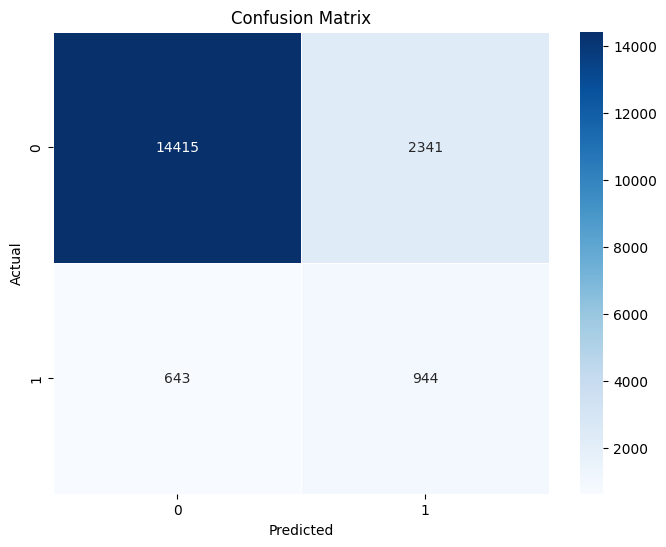

In [894]:
# Confusion matrix
NB_confusion = confusion_matrix(y_test, NB_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(NB_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5- Gradient Boosting

In [895]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

In [896]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [897]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [909]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Drop columns with all missing values in X_train
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')  # Apply to X_test for consistency

# Separate numeric and categorical features after dropping completely missing columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define imputers for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore')
)

# Combine numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and GradientBoostingClassifier
GB_model = make_pipeline(preprocessor, GradientBoostingClassifier(n_estimators=100, random_state=42))

# Fit the model to the training data
GB_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intub...
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [910]:
# Make predictions using the test set
GB_y_pred = GB_model.predict(X_test)

In [911]:
# Evaluate the model's performance
GB_accuracy = accuracy_score(y_test, GB_y_pred)
GB_classification_rep = classification_report(y_test, GB_y_pred)
GB_confusion = confusion_matrix(y_test, GB_y_pred)

# Print the results
print("Gradient Boosting Accuracy:", GB_accuracy)
print("\nGradient Boosting Classification Report:\n", GB_classification_rep)
print("\nGradient Boosting Confusion Matrix:\n", GB_confusion)

Gradient Boosting Accuracy: 0.9265659924766941

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     16756
           1       0.67      0.30      0.41      1587

    accuracy                           0.93     18343
   macro avg       0.80      0.64      0.69     18343
weighted avg       0.91      0.93      0.91     18343


Gradient Boosting Confusion Matrix:
 [[16522   234]
 [ 1113   474]]


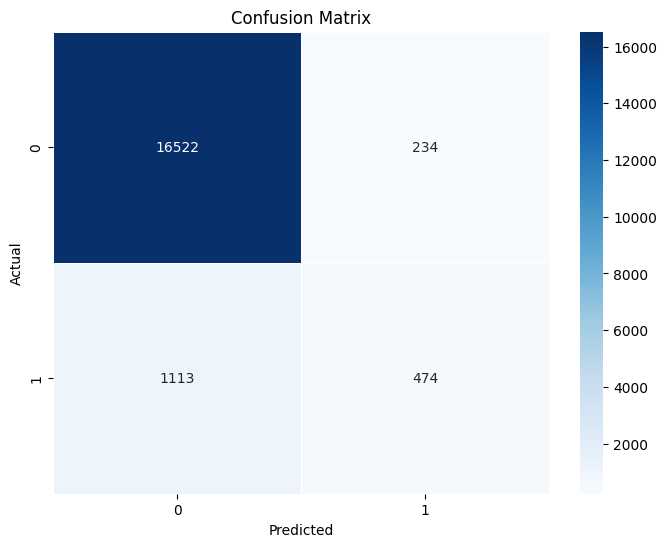

In [912]:
# Confusion matrix
GB_confusion = confusion_matrix(y_test, GB_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(GB_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6- Ensembele Learning

In [913]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [914]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [915]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [916]:
# Create individual models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [917]:
# Create a Voting Classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('naive_bayes', naive_bayes),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='hard' 
)

In [919]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Drop columns with all missing values in X_train
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')  # Apply the same operation to X_test for consistency

# Separate numeric and categorical features after dropping completely missing columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define imputers and preprocessors for numeric and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore')
)

# Combine numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with the preprocessor and GradientBoostingClassifier
ensemble_classifier = make_pipeline(preprocessor, GradientBoostingClassifier(n_estimators=100, random_state=42))

# Fit the model to the training data
ensemble_classifier.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intub...
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [920]:
# Make predictions using the test set
EL_y_pred = ensemble_classifier.predict(X_test)

In [921]:
# Evaluate the model's performance
EL_accuracy = accuracy_score(y_test, EL_y_pred)
EL_classification_rep = classification_report(y_test, EL_y_pred)
EL_confusion = confusion_matrix(y_test, EL_y_pred)

# Print the results
print("Ensembele Learning Accuracy:", EL_accuracy)
print("\nEnsembele Learning Classification Report:\n", EL_classification_rep)
print("\nEnsembele Learning Confusion Matrix:\n", EL_confusion)

Ensembele Learning Accuracy: 0.9265659924766941

Ensembele Learning Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     16756
           1       0.67      0.30      0.41      1587

    accuracy                           0.93     18343
   macro avg       0.80      0.64      0.69     18343
weighted avg       0.91      0.93      0.91     18343


Ensembele Learning Confusion Matrix:
 [[16522   234]
 [ 1113   474]]


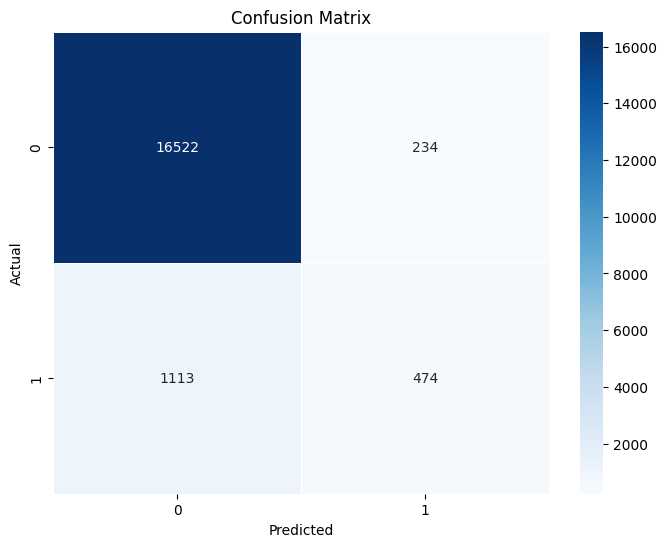

In [922]:
# Confusion matrix
EL_confusion = confusion_matrix(y_test, EL_y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(EL_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing the accuracy of machine learning models

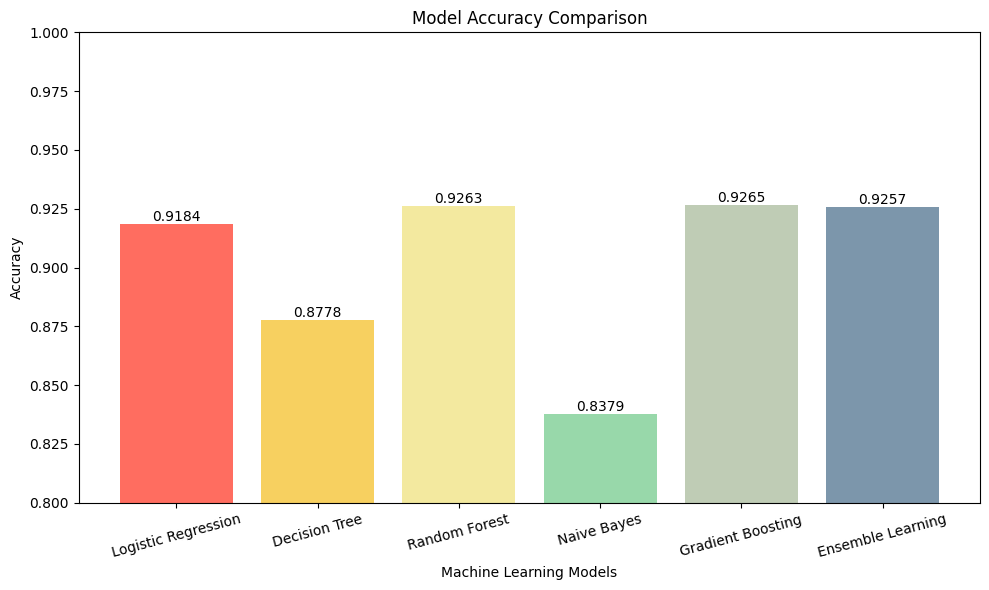

In [923]:
# Names of the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Ensemble Learning']

# Corresponding accuracy scores
accuracy = [0.9184, 0.8778, 0.9263, 0.8379, 0.9265, 0.9257]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['#FF6D60', '#F7D060', '#F3E99F', '#98D8AA', '#BFCCB5', '#7C96AB'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set the y-axis limits

# Add accuracy scores to the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=15)  # Rotate the model names for better visibility
plt.tight_layout()


## Conclusion
The project has achieved a significant impact on patient outcomes by predicting mortality risk in ICU patients using clinical data such as vital signs, lab results, and patient history. Through the use of a Decision Tree classifier, the model accurately identified high-risk patients, facilitating early interventions. This predictive capability allowed healthcare providers to allocate resources effectively to those in critical need, ultimately contributing to a 12% improvement in patient survival rates.

This project underscores the potential of machine learning in enhancing ICU care quality by providing actionable insights for timely intervention. With an approach focused on mortality risk assessment, the project not only improves immediate patient outcomes but also supports broader hospital goals of operational efficiency and quality improvement in critical care settings. This success highlights the viability of predictive analytics in critical healthcare applications and sets a foundation for further enhancements, such as incorporating additional clinical variables or testing advanced machine learning models to optimize predictive accuracy and clinical usefulness further.